# Data Preprocessing and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/milk_supply_and_utilization.csv')
df.head()

,Year,Month,Beginning stocks \n[A],Production [B],Farm use \n[C],Marketings \n[D] \n= [B - C],Imports \n[E],Total supply \n[F] \n= [A + D + E],Exports [G],Ending stocks [H],Domestic disappearance\n[I] \n= [F - G - H]
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096


In [3]:
# Renaming the columns
df.columns = [
    'Year', 'Month', 'Beginning stocks', 'Production',
    'Farm use', 'Marketings', 'Imports',
    'Total supply', 'Exports', 'Ending stocks',
    'Domestic disappearance'
]

# Display the updated DataFrame
df.head()


,Year,Month,Beginning stocks,Production,Farm use,Marketings,Imports,Total supply,Exports,Ending stocks,Domestic disappearance
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    164 non-null    int64  
 1   Month                   164 non-null    object 
 2   Beginning stocks        164 non-null    int64  
 3   Production              164 non-null    int64  
 4   Farm use                164 non-null    float64
 5   Marketings              164 non-null    float64
 6   Imports                 164 non-null    int64  
 7   Total supply            164 non-null    float64
 8   Exports                 164 non-null    int64  
 9   Ending stocks           164 non-null    int64  
 10  Domestic disappearance  164 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 14.2+ KB


In [5]:
# Combine Year and Month into a new 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')

# Display the updated DataFrame
df.head(20)

,Year,Month,Beginning stocks,Production,Farm use,Marketings,Imports,Total supply,Exports,Ending stocks,Domestic disappearance,Date
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096,2011-01-01
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603,2011-02-01
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096,2011-03-01
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932,2011-04-01
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096,2011-05-01
5,2011,Jun,12556,16514,79.315068,16434.684932,238,29228.684932,838,13264,15126.684932,2011-06-01
6,2011,Jul,13264,16478,81.958904,16396.041096,280,29940.041096,734,13670,15536.041096,2011-07-01
7,2011,Aug,13670,16425,81.958904,16343.041096,275,30288.041096,781,13003,16504.041096,2011-08-01
8,2011,Sep,13003,15780,79.315068,15700.684932,250,28953.684932,595,12225,16133.684932,2011-09-01
9,2011,Oct,12225,16272,81.958904,16190.041096,356,28771.041096,615,11207,16949.041096,2011-10-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    164 non-null    int64         
 1   Month                   164 non-null    object        
 2   Beginning stocks        164 non-null    int64         
 3   Production              164 non-null    int64         
 4   Farm use                164 non-null    float64       
 5   Marketings              164 non-null    float64       
 6   Imports                 164 non-null    int64         
 7   Total supply            164 non-null    float64       
 8   Exports                 164 non-null    int64         
 9   Ending stocks           164 non-null    int64         
 10  Domestic disappearance  164 non-null    float64       
 11  Date                    164 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object

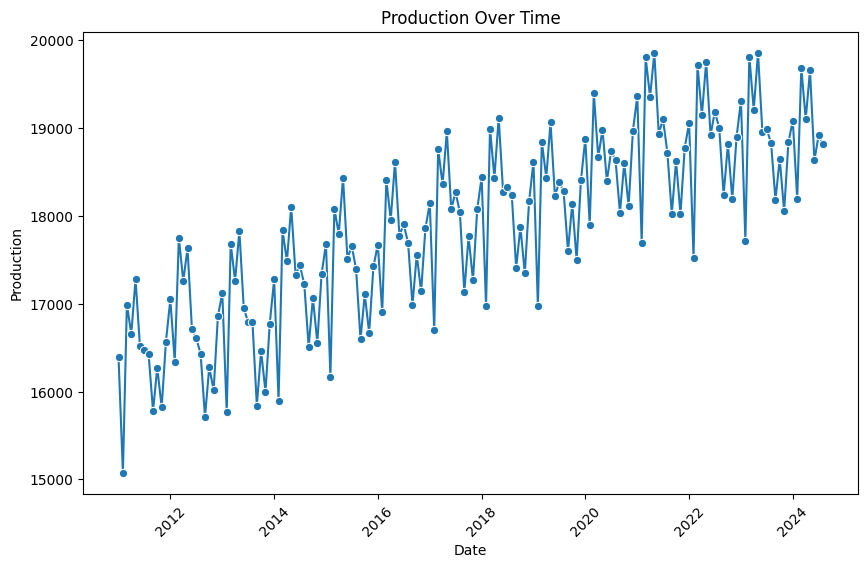

In [7]:
# Production Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Production', marker='o')
plt.title('Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-4123b4b3b795>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Ending stocks', palette='viridis')


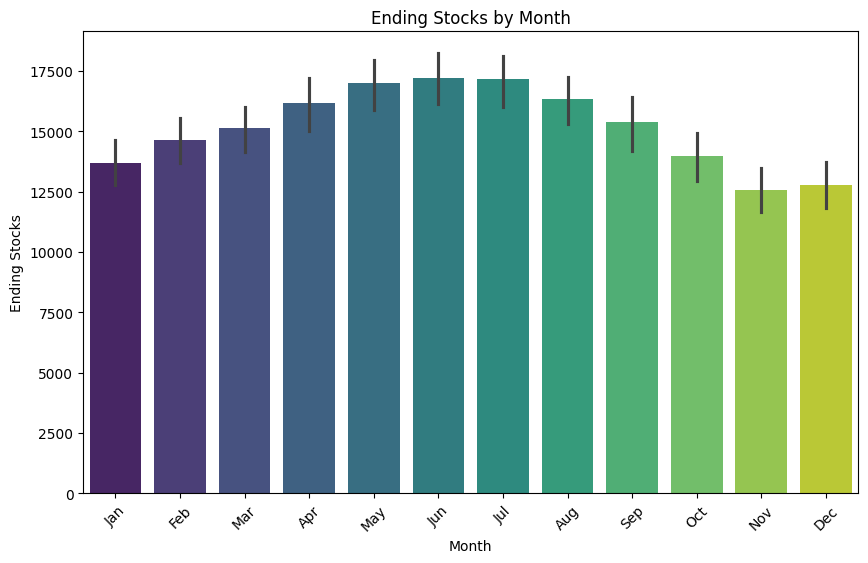

In [8]:
# Ending Stocks by Month
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Month', y='Ending stocks', palette='viridis')
plt.title('Ending Stocks by Month')
plt.xlabel('Month')
plt.ylabel('Ending Stocks')
plt.xticks(rotation=45)
plt.show()


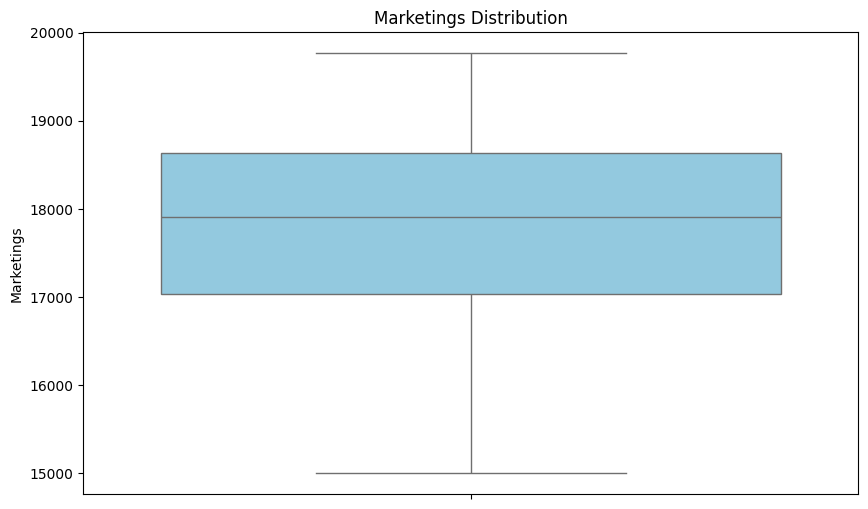

In [9]:
# Distribution of Marketings
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Marketings', color='skyblue')
plt.title('Marketings Distribution')
plt.ylabel('Marketings')
plt.show()


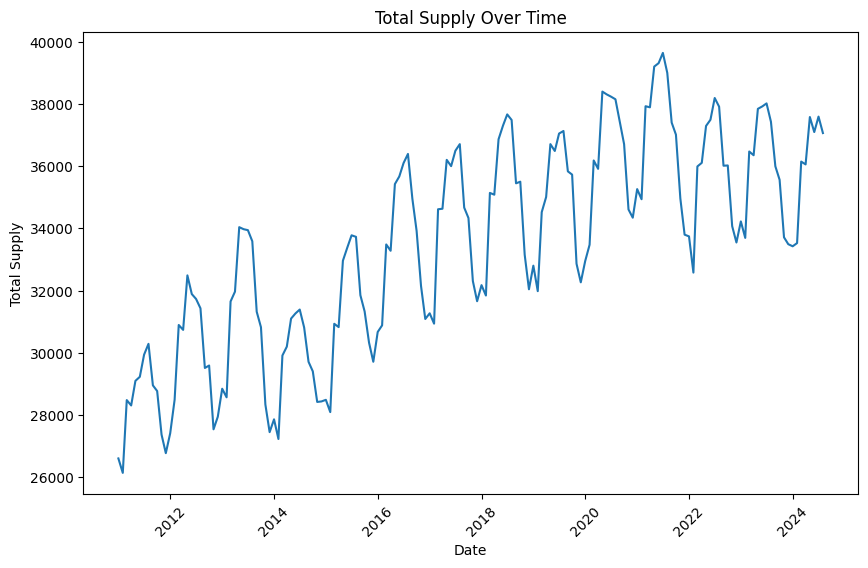

In [11]:
# Production Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Total supply')
plt.title('Total Supply Over Time')
plt.xlabel('Date')
plt.ylabel('Total Supply')
plt.xticks(rotation=45)
plt.show()

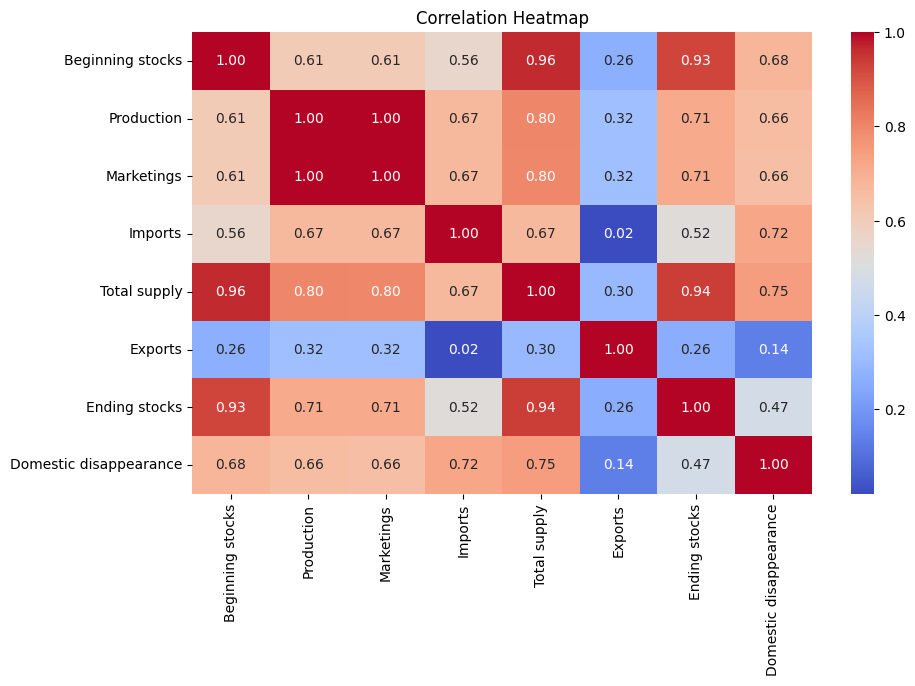

In [12]:
# Correlation Heatmap
corr = df[['Beginning stocks', 'Production', 'Marketings', 'Imports', 'Total supply', 'Exports', 'Ending stocks', 'Domestic disappearance']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals strong relationships between key variables in the dataset. Beginning and ending stocks show a high positive correlation (0.93), indicating that the starting inventory closely predicts the ending inventory. Production and marketing efforts are also strongly linked (0.80), suggesting that higher production leads to increased marketings. Total supply is positively correlated with both ending stocks (0.94) and domestic disappearance (0.75), highlighting its impact on these factors. Imports show a moderate correlation with domestic disappearance (0.72), implying that higher imports influence consumption levels.

Exports have weak correlations with other variables, showing minimal influence on production, marketings, and supply levels, suggesting that exports are relatively independent. While production, marketing, and total supply are strongly connected, exports seem less affected by these factors. Overall, the heatmap provides insights into stock management, forecasting, and the relationships between production, marketing, and supply factors.

# Arima Model

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set Date as the index
df.set_index('Date', inplace=True)


## Perform ADF test to check for stationarity

In [14]:
# Perform ADF test to check for stationarity
result = adfuller(df['Total supply'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.3399537072117869
p-value: 0.610701111284277


## Plot ACF and PACF to determine p and q

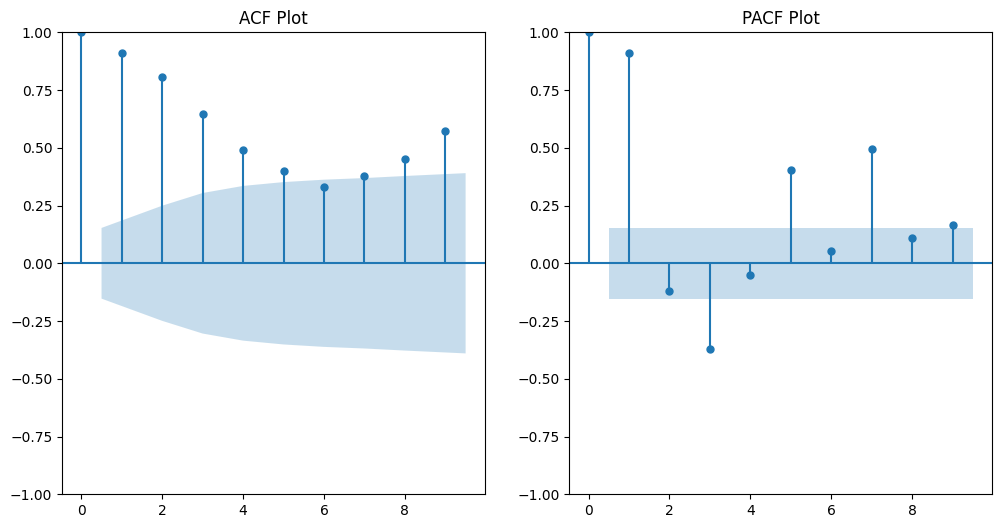

In [15]:
# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('PACF Plot')
plt.show()


In [16]:
# Apply differencing if non-stationary
df['Differenced Total supply'] = df['Total supply'].diff()

# Check for stationarity after differencing
result_differenced = adfuller(df['Differenced Total supply'].dropna())
print('ADF Statistic after Differencing:', result_differenced[0])
print('p-value after Differencing:', result_differenced[1])


ADF Statistic after Differencing: -3.291937987562436
p-value after Differencing: 0.01524271535331003


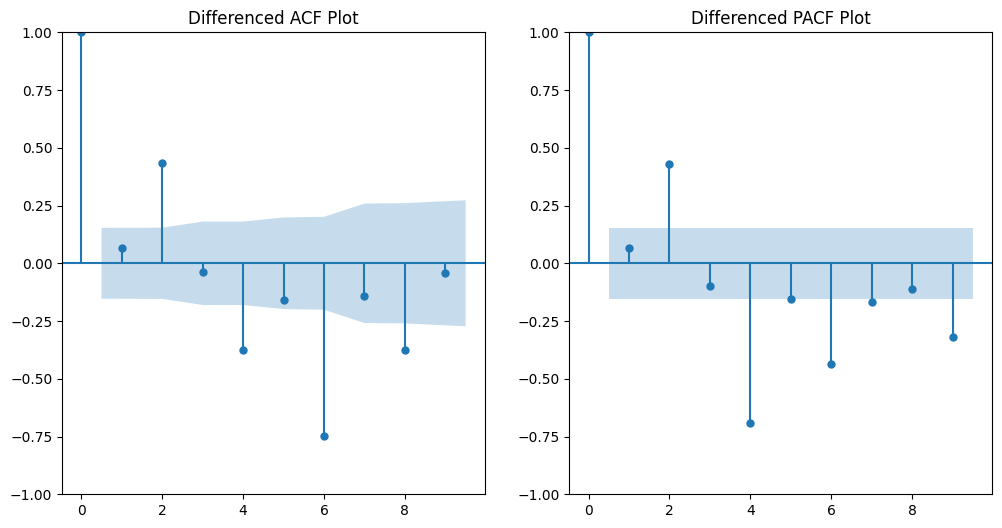

In [17]:
# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Differenced Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('Differenced ACF Plot')

plt.subplot(122)
plot_pacf(df['Differenced Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('Differenced PACF Plot')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Define train-test split ratio (e.g., 80% train, 20% test)
train_size = 0.8

# Splitting data
train_data, test_data = train_test_split(df, test_size=1-train_size, shuffle=False)

# Separate 'Total supply' for train and test
train_series = train_data['Total supply']
test_series = test_data['Total supply']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Test Set MAE: 981.8222017058214
ARIMA Test Set MSE: 1527974.693563166
ARIMA Test Set RMSE: 1236.1127349732976
ARIMA Test Set MAPE: 2.8346772377050433


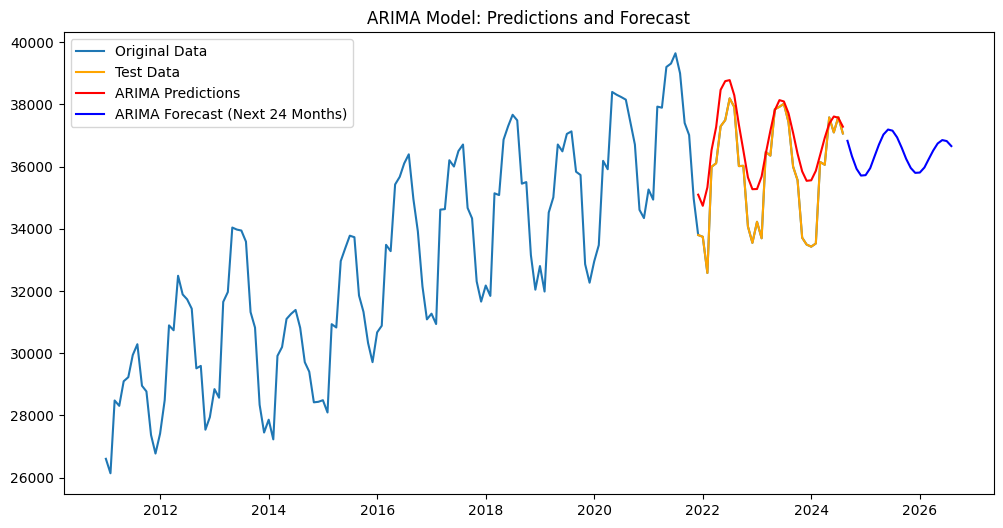

ARIMA Forecasted Values (Next 24 Months):
2024-09-01    36825.350198
2024-10-01    36332.730866
2024-11-01    35927.337755
2024-12-01    35708.841282
2025-01-01    35722.008311
2025-02-01    35946.459720
2025-03-01    36310.600632
2025-04-01    36706.899153
2025-05-01    37027.196329
2025-06-01    37188.128385
2025-07-01    37152.365558
2025-08-01    36937.090952
2025-09-01    36604.607165
2025-10-01    36245.635389
2025-11-01    35952.518688
2025-12-01    35795.576694
2026-01-01    35805.866773
2026-02-01    35968.564096
2026-03-01    36229.993912
2026-04-01    36513.142267
2026-05-01    36739.499161
2026-06-01    36849.626535
2026-07-01    36817.653198
2026-08-01    36656.513764
Freq: MS, Name: predicted_mean, dtype: float64


In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit ARIMA model on training data
model_arima = ARIMA(train_series, order=(5, 0, 1))
model_arima_fit = model_arima.fit()

# Predict on the test set
predictions_arima = model_arima_fit.forecast(steps=len(test_series))

# Evaluate predictions
mae_arima = mean_absolute_error(test_series, predictions_arima)
mse_arima = mean_squared_error(test_series, predictions_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((test_series - predictions_arima) / test_series)) * 100

# Print evaluation metrics
print("ARIMA Test Set MAE:", mae_arima)
print("ARIMA Test Set MSE:", mse_arima)
print("ARIMA Test Set RMSE:", rmse_arima)
print("ARIMA Test Set MAPE:", mape_arima)

# Forecast the next 24 months
forecast_arima = model_arima_fit.forecast(steps=len(test_series) + 24)[-24:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Total supply'], label='Original Data')
plt.plot(test_series.index, test_series, label='Test Data', color='orange')
plt.plot(test_series.index, predictions_arima, label='ARIMA Predictions', color='red')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast (Next 24 Months)', color='blue')
plt.title('ARIMA Model: Predictions and Forecast')
plt.legend()
plt.show()

# Display forecasted values
print("ARIMA Forecasted Values (Next 24 Months):")
print(forecast_arima)


# Exponential Smoothing Model

Exponential Smoothing Test Set MAE: 1452.2315825712758
Exponential Smoothing Test Set MSE: 2254621.410737429
Exponential Smoothing Test Set RMSE: 1501.5396800409335
Exponential Smoothing Test Set MAPE: 4.052480395231088


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


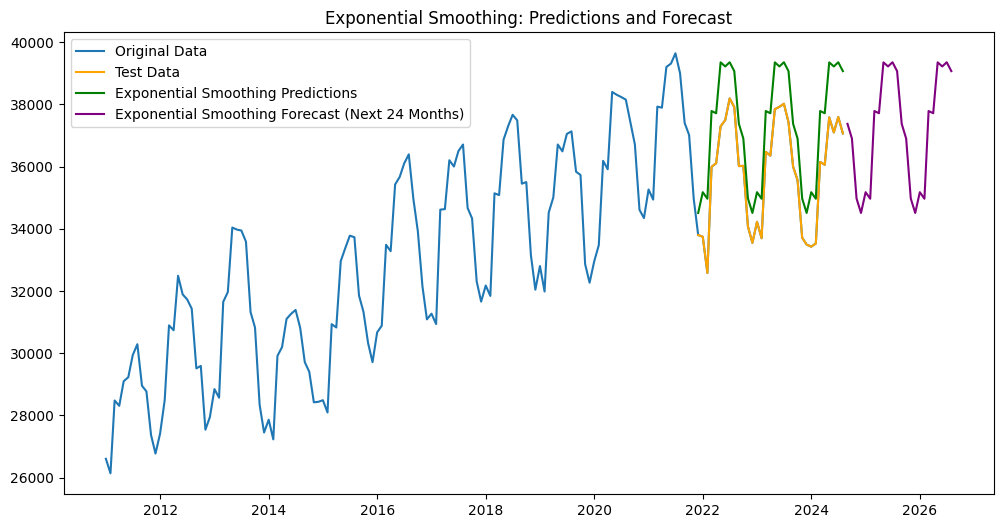

Exponential Smoothing Forecasted Values (Next 24 Months):
2024-09-01    37372.225836
2024-10-01    36897.918604
2024-11-01    34971.541714
2024-12-01    34506.940207
2025-01-01    35174.388284
2025-02-01    34963.801505
2025-03-01    37783.282881
2025-04-01    37712.406761
2025-05-01    39347.422452
2025-06-01    39216.538759
2025-07-01    39350.632934
2025-08-01    39065.513517
2025-09-01    37372.225836
2025-10-01    36897.918604
2025-11-01    34971.541714
2025-12-01    34506.940207
2026-01-01    35174.388284
2026-02-01    34963.801505
2026-03-01    37783.282881
2026-04-01    37712.406761
2026-05-01    39347.422452
2026-06-01    39216.538759
2026-07-01    39350.632934
2026-08-01    39065.513517
Freq: MS, dtype: float64


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit Exponential Smoothing model on training data
model_exp = ExponentialSmoothing(train_series, seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()

# Predict on the test set
predictions_exp = model_exp_fit.forecast(steps=len(test_series))

# Evaluate predictions
mae_exp = mean_absolute_error(test_series, predictions_exp)
mse_exp = mean_squared_error(test_series, predictions_exp)
rmse_exp = np.sqrt(mse_exp)
mape_exp = np.mean(np.abs((test_series - predictions_exp) / test_series)) * 100

# Print evaluation metrics
print("Exponential Smoothing Test Set MAE:", mae_exp)
print("Exponential Smoothing Test Set MSE:", mse_exp)
print("Exponential Smoothing Test Set RMSE:", rmse_exp)
print("Exponential Smoothing Test Set MAPE:", mape_exp)

# Forecast the next 24 months
forecast_exp = model_exp_fit.forecast(steps=len(test_series) + 24)[-24:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Total supply'], label='Original Data')
plt.plot(test_series.index, test_series, label='Test Data', color='orange')
plt.plot(test_series.index, predictions_exp, label='Exponential Smoothing Predictions', color='green')
plt.plot(forecast_exp.index, forecast_exp, label='Exponential Smoothing Forecast (Next 24 Months)', color='purple')
plt.title('Exponential Smoothing: Predictions and Forecast')
plt.legend()
plt.show()

# Display forecasted values
print("Exponential Smoothing Forecasted Values (Next 24 Months):")
print(forecast_exp)


# Prophet Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/nl_whov1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/t03afn42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77528', 'data', 'file=/tmp/tmp9v2t59hb/nl_whov1.json', 'init=/tmp/tmp9v2t59hb/t03afn42.json', 'output', 'file=/tmp/tmp9v2t59hb/prophet_modelxsun50n6/prophet_model-20241210203624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

Prophet Test Set MAE: 3103.9929347872285
Prophet Test Set MSE: 10725447.652340023
Prophet Test Set RMSE: 3274.9729239094518
Prophet Test Set MAPE: 8.66495905485191


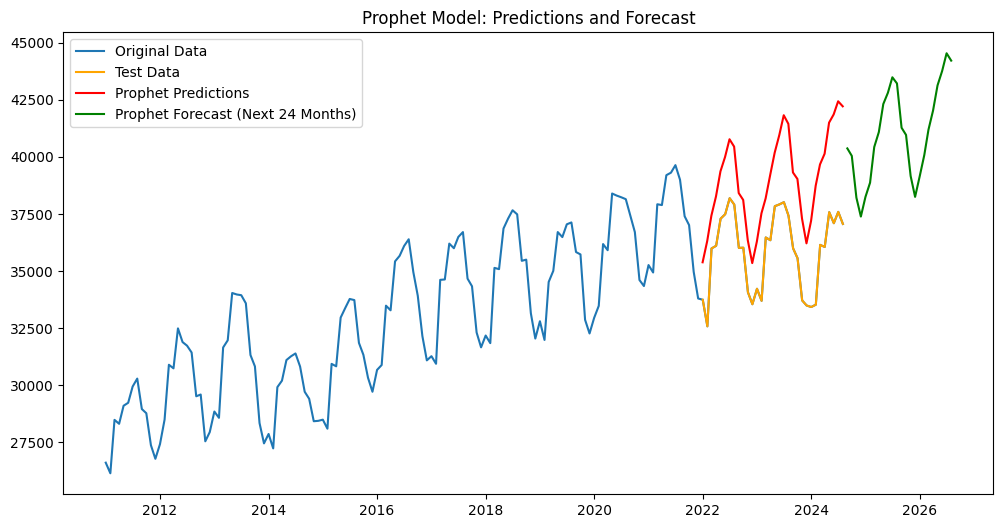

Prophet Forecasted Values (Next 24 Months):
164    40372.089620
165    40044.701048
166    38213.845301
167    37386.511724
168    38248.141379
169    38871.657032
170    40432.485018
171    41086.829530
172    42315.694677
173    42809.928407
174    43487.784524
175    43218.061985
176    41277.952466
177    40963.413272
178    39163.919256
179    38249.201262
180    39149.629259
181    40083.642665
182    41191.099802
183    42034.551236
184    43132.839439
185    43763.058088
186    44539.719399
187    44217.452667
Name: yhat, dtype: float64


In [21]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the size of the test set (20% of the data)
test_size = int(len(df) * 0.2)

# Prepare the data for Prophet
df_prophet = df.reset_index()[['Date', 'Total supply']]
df_prophet.columns = ['ds', 'y']

# Split the data into training and testing sets
train_prophet = df_prophet[:-test_size]  # Training data (80%)
test_prophet = df_prophet[-test_size:]   # Test data (20%)

# Get the actual values from the test set
test_series = test_prophet['y']

# Initialize and fit the Prophet model on the training data
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Make predictions on the test set
future = model_prophet.make_future_dataframe(periods=test_size, freq='M')
forecast_prophet = model_prophet.predict(future)

# Evaluate predictions (MAE)
predictions_prophet = forecast_prophet['yhat'][-test_size:]
mae_prophet = mean_absolute_error(test_series, predictions_prophet)

# Calculate MSE
mse_prophet = mean_squared_error(test_series, predictions_prophet)

# Calculate RMSE
rmse_prophet = np.sqrt(mse_prophet)

# Calculate MAPE
mape_prophet = np.mean(np.abs((test_series - predictions_prophet) / test_series)) * 100

# Print evaluation metrics
print("Prophet Test Set MAE:", mae_prophet)
print("Prophet Test Set MSE:", mse_prophet)
print("Prophet Test Set RMSE:", rmse_prophet)
print("Prophet Test Set MAPE:", mape_prophet)

# Forecast the next 24 months
future_forecast = model_prophet.make_future_dataframe(periods=test_size + 24, freq='M')
forecast_24_months_df = model_prophet.predict(future_forecast)
forecast_24_months = forecast_24_months_df['yhat'][-24:]

# Plot the combined results with different colors
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Original Data')
plt.plot(test_prophet['ds'], test_series, label='Test Data', color='orange')

# Predictions in red
plt.plot(forecast_prophet['ds'][-test_size:], forecast_prophet['yhat'][-test_size:], label='Prophet Predictions', color='red')

# Forecast in green
plt.plot(forecast_24_months_df['ds'][-24:], forecast_24_months_df['yhat'][-24:], label='Prophet Forecast (Next 24 Months)', color='green')

plt.title('Prophet Model: Predictions and Forecast')
plt.legend()
plt.show()

# Display forecasted values
print("Prophet Forecasted Values (Next 24 Months):")
print(forecast_24_months)


In [22]:
# Display the forecasted values
print("Prophet Forecasted Values:")
print(forecast_24_months_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))

Prophet Forecasted Values:
            ds          yhat    yhat_lower    yhat_upper
164 2024-08-31  40372.089620  38472.279451  42354.540514
165 2024-09-30  40044.701048  37924.036642  42078.134343
166 2024-10-31  38213.845301  36155.535609  40339.315727
167 2024-11-30  37386.511724  35261.822042  39700.333708
168 2024-12-31  38248.141379  35955.094395  40620.194001
169 2025-01-31  38871.657032  36503.623491  41177.217803
170 2025-02-28  40432.485018  38078.066010  42902.614104
171 2025-03-31  41086.829530  38486.452486  43668.005885
172 2025-04-30  42315.694677  39712.443989  44920.330632
173 2025-05-31  42809.928407  40058.980404  45366.453845
174 2025-06-30  43487.784524  40647.969615  46282.575933
175 2025-07-31  43218.061985  40195.827415  46183.733483
176 2025-08-31  41277.952466  38216.300537  44197.087040
177 2025-09-30  40963.413272  37812.999784  43988.017759
178 2025-10-31  39163.919256  35913.596736  42334.650065
179 2025-11-30  38249.201262  34875.292278  41452.768491
180 

In [23]:
# Convert Prophet forecast to DataFrame for further analysis
forecast_prophet_df = forecast_24_months_df[['ds', 'yhat']].tail(24)  # Get only the next 12 months
forecast_prophet_df.columns = ['Date', 'Forecasted Total Supply']

# Display forecast DataFrame
print(forecast_prophet_df)


          Date  Forecasted Total Supply
164 2024-08-31             40372.089620
165 2024-09-30             40044.701048
166 2024-10-31             38213.845301
167 2024-11-30             37386.511724
168 2024-12-31             38248.141379
169 2025-01-31             38871.657032
170 2025-02-28             40432.485018
171 2025-03-31             41086.829530
172 2025-04-30             42315.694677
173 2025-05-31             42809.928407
174 2025-06-30             43487.784524
175 2025-07-31             43218.061985
176 2025-08-31             41277.952466
177 2025-09-30             40963.413272
178 2025-10-31             39163.919256
179 2025-11-30             38249.201262
180 2025-12-31             39149.629259
181 2026-01-31             40083.642665
182 2026-02-28             41191.099802
183 2026-03-31             42034.551236
184 2026-04-30             43132.839439
185 2026-05-31             43763.058088
186 2026-06-30             44539.719399
187 2026-07-31             44217.452667


# Combination of the 3 models

In [24]:
# Combine forecasts into a single DataFrame
combined_forecasts = pd.DataFrame({
    'Date': forecast_prophet_df['Date'],
    'ARIMA Forecast': forecast_arima.values,
    'Exponential Smoothing Forecast': forecast_exp.values,
    'Prophet Forecast': forecast_prophet_df['Forecasted Total Supply'].values
})

# Display combined forecast DataFrame
combined_forecasts


,Date,ARIMA Forecast,Exponential Smoothing Forecast,Prophet Forecast
164,2024-08-31,36825.350198,37372.225836,40372.089620
165,2024-09-30,36332.730866,36897.918604,40044.701048
166,2024-10-31,35927.337755,34971.541714,38213.845301
167,2024-11-30,35708.841282,34506.940207,37386.511724
168,2024-12-31,35722.008311,35174.388284,38248.141379
169,2025-01-31,35946.459720,34963.801505,38871.657032
170,2025-02-28,36310.600632,37783.282881,40432.485018
171,2025-03-31,36706.899153,37712.406761,41086.829530
172,2025-04-30,37027.196329,39347.422452,42315.694677
173,2025-05-31,37188.128385,39216.538759,42809.928407


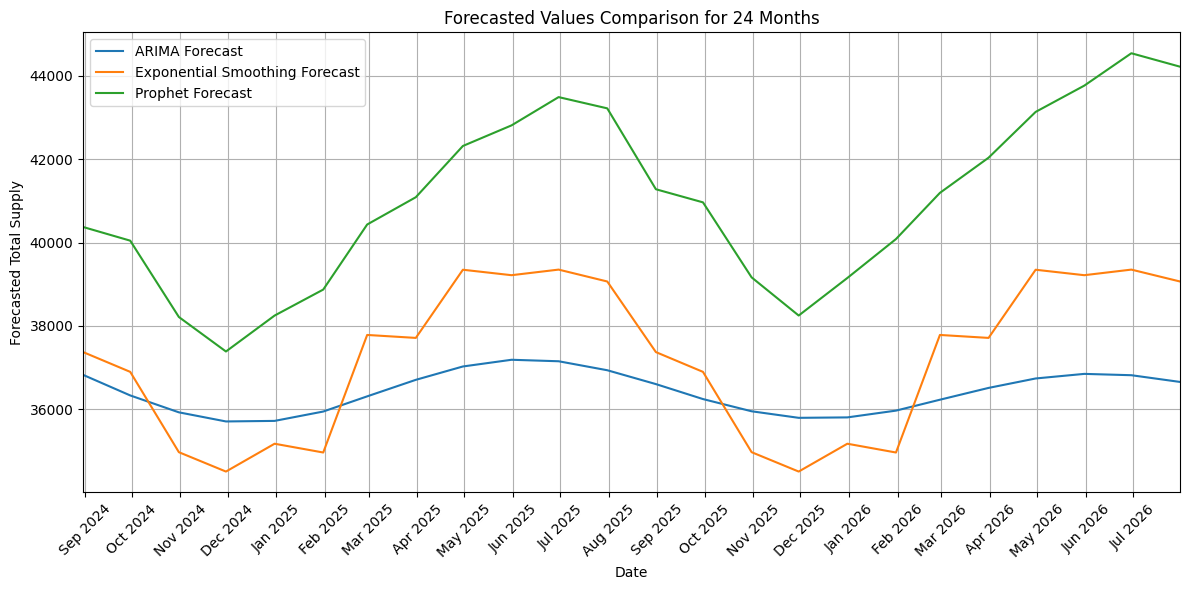

In [25]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each forecast without markers
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet Forecast')

# Add title and labels
plt.title('Forecasted Values Comparison for 24 Months')
plt.xlabel('Date')
plt.ylabel('Forecasted Total Supply')

# Improve x-tick formatting for better readability
plt.xticks(rotation=45)
plt.xticks(pd.date_range(start='2024-08-01', end='2026-08-01', freq='MS'),
           [date.strftime('%b %Y') for date in pd.date_range(start='2024-08-01', end='2026-08-01', freq='MS')])

# Add x-axis limits to cover the full forecast range
plt.xlim([combined_forecasts['Date'].min(), combined_forecasts['Date'].max()])

plt.legend()

# Show grid
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

# Hybrid Model Forcast

In [26]:
# Define weights for the hybrid model
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3

# Combine test set predictions using weights
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)


test_predictions_hybrid = test_predictions_hybrid[:len(test_series)]

# Assuming test_series and test_predictions_hybrid now have the same length
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'][:len(test_series)] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'][:len(test_series)] +
    w_prophet * combined_forecasts['Prophet Forecast'][:len(test_series)]
)


test_series_subset = test_series[:len(test_predictions_hybrid)]
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)

# Evaluate hybrid predictions on the test set (using the appropriate subset of test_series)
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)
mse_hybrid = mean_squared_error(test_series_subset, test_predictions_hybrid)
rmse_hybrid = np.sqrt(mse_hybrid)

# Align indices before applying the boolean mask
test_predictions_hybrid = test_predictions_hybrid.reset_index(drop=True)
test_series_subset = test_series_subset.reset_index(drop=True)

non_zero_indices = test_series_subset != 0
mape_hybrid = np.mean(np.abs((test_series_subset[non_zero_indices] - test_predictions_hybrid[non_zero_indices]) / test_series_subset[non_zero_indices])) * 100


print("Hybrid Model Evaluation on Test Set:")
print(f"MAE: {mae_hybrid:.2f}")
print(f"MSE: {mse_hybrid:.2f}")
print(f"RMSE: {rmse_hybrid:.2f}")
print(f"MAPE: {mape_hybrid:.2f}%")


Hybrid Model Evaluation on Test Set:
MAE: 2612.82
MSE: 11573771.22
RMSE: 3402.02
MAPE: 7.57%


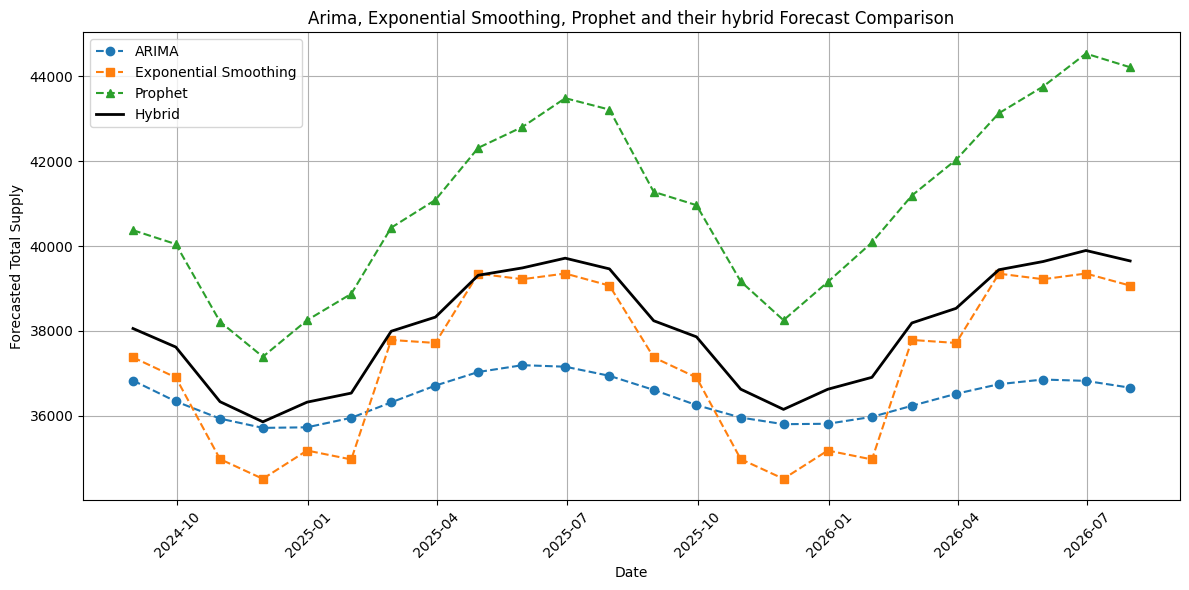

In [27]:
# Hybrid forecast as weighted average
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3
combined_forecasts['Hybrid'] = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)

# Plot hybrid and individual forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA', linestyle='--', marker='o')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing', linestyle='--', marker='s')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet', linestyle='--', marker='^')
plt.plot(combined_forecasts['Date'], combined_forecasts['Hybrid'], label='Hybrid', linestyle='-', linewidth=2, color='black')

plt.title('Arima, Exponential Smoothing, Prophet and their hybrid Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Total Supply')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


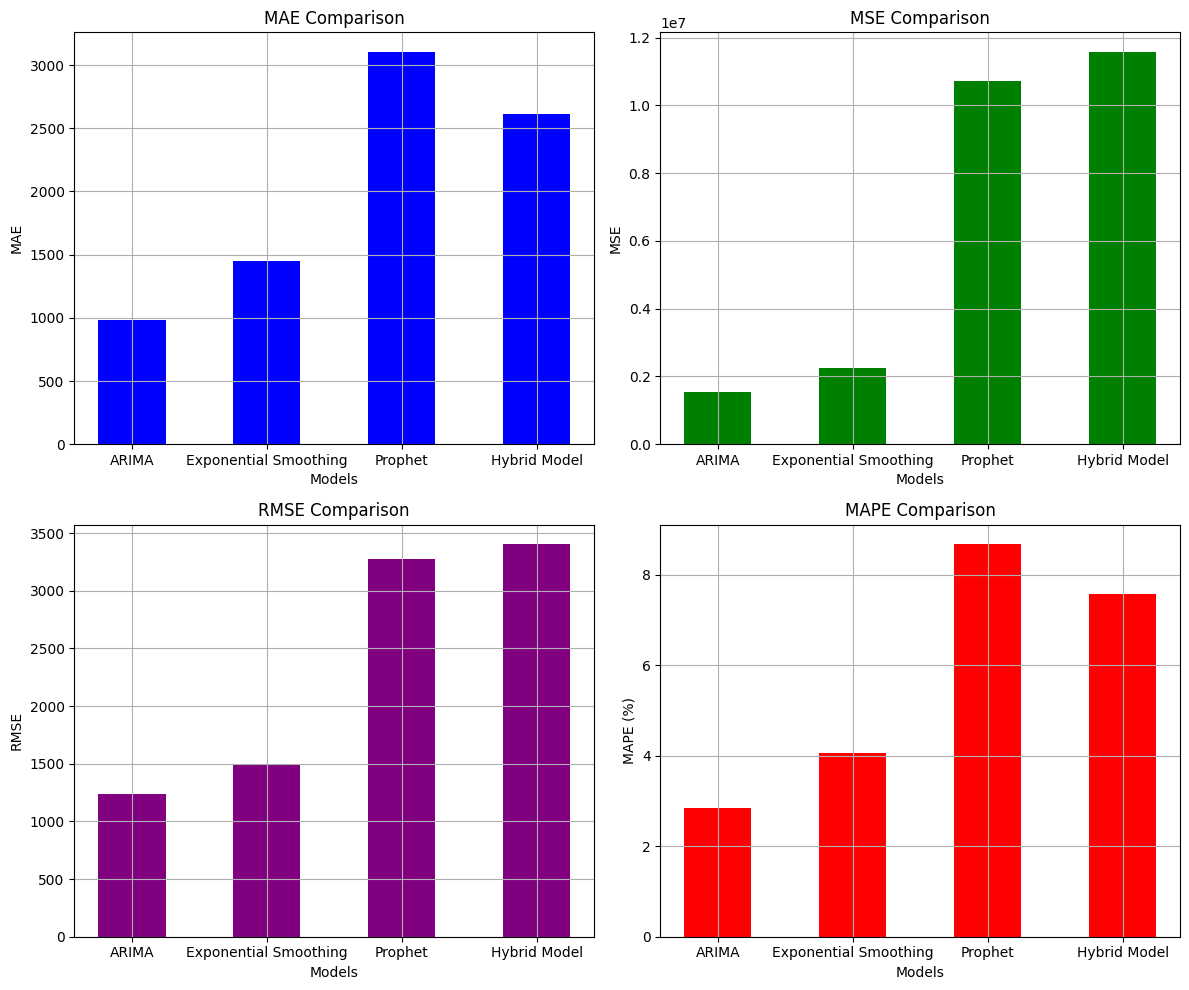

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['ARIMA', 'Exponential Smoothing', 'Prophet', 'Hybrid Model']
mae_values = [mae_arima, mae_exp, mae_prophet, mae_hybrid]
mse_values = [mse_arima, mse_exp, mse_prophet, mse_hybrid]
rmse_values = [rmse_arima, rmse_exp, rmse_prophet, rmse_hybrid]
mape_values = [mape_arima, mape_exp, mape_prophet, mape_hybrid]

# Set positions for the bars
x = np.arange(len(models))
width = 0.5

# Create plots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot MAE
axes[0, 0].bar(x, mae_values, width, color='blue')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].grid(True)

# Plot MSE
axes[0, 1].bar(x, mse_values, width, color='green')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].grid(True)

# Plot RMSE
axes[1, 0].bar(x, rmse_values, width, color='purple')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models)
axes[1, 0].grid(True)

# Plot MAPE
axes[1, 1].bar(x, mape_values, width, color='red')
axes[1, 1].set_title('MAPE Comparison')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Forecasting Production Needs

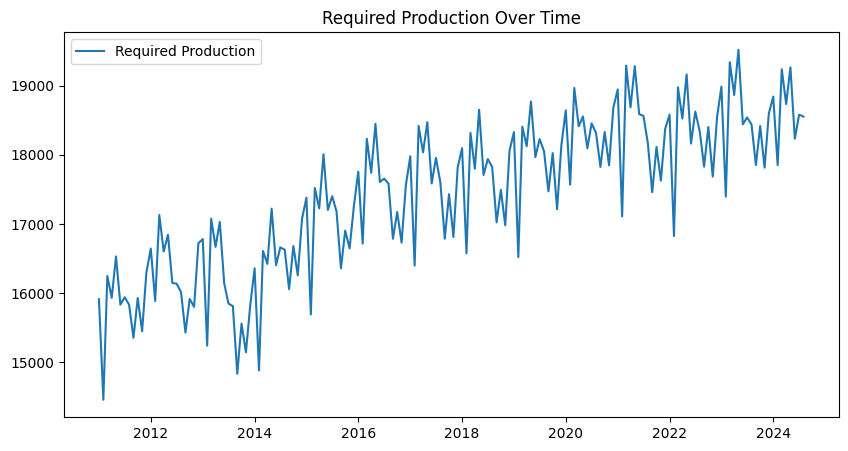

In [29]:
# Calculate the required production
df['Required Production'] = df['Total supply'] - df['Beginning stocks'] - df['Exports']

# Display the updated DataFrame with Required Production
df.head()

# Visualize the Required Production
plt.figure(figsize=(10, 5))
plt.plot(df['Required Production'], label='Required Production')
plt.title('Required Production Over Time')
plt.legend()
plt.show()


# Forecasting with ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Model Evaluation on Test Set:
MAE: 939.02
MSE: 1112425.65
RMSE: 1054.72
MAPE: 5.02%


<ipython-input-30-1be17b236134>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test_series.index[-1], periods=25, freq='M')[1:]  # Generate future dates


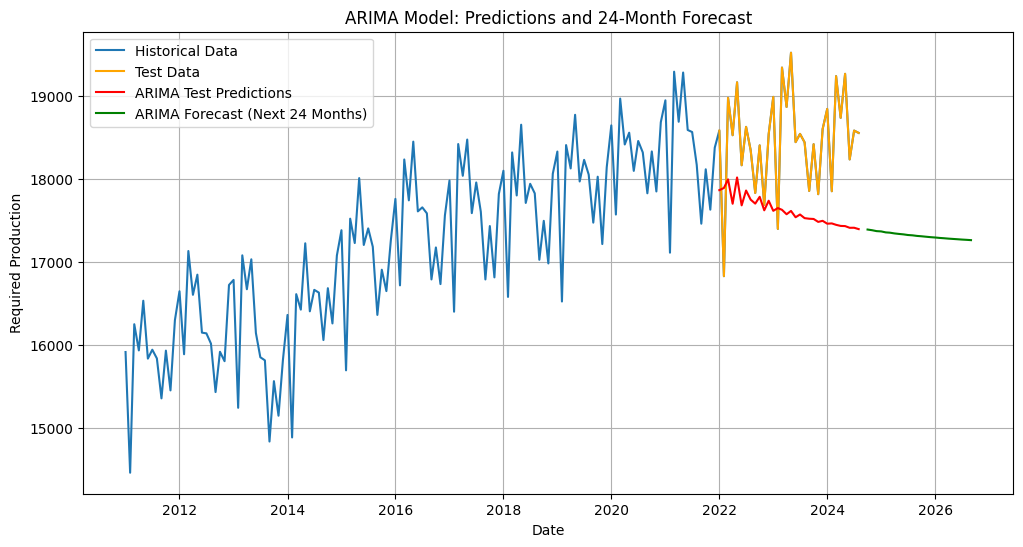

ARIMA Forecasted Values (Next 24 Months):
2024-09-01    17389.833640
2024-10-01    17381.507792
2024-11-01    17370.656979
2024-12-01    17367.258368
2025-01-01    17355.428080
2025-02-01    17351.874785
2025-03-01    17343.033258
2025-04-01    17336.943392
2025-05-01    17331.563416
2025-06-01    17323.871106
2025-07-01    17320.015121
2025-08-01    17312.838292
2025-09-01    17308.599442
2025-10-01    17303.119861
2025-11-01    17298.013162
2025-12-01    17293.956029
2026-01-01    17288.656985
2026-02-01    17285.086410
2026-03-01    17280.410077
2026-04-01    17276.687794
2026-05-01    17272.895396
2026-06-01    17269.013473
2026-07-01    17265.829231
2026-08-01    17262.130629
Freq: MS, Name: predicted_mean, dtype: float64


In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
df['Required Production'] = df['Total supply'] - df['Beginning stocks'] - df['Exports']

# Step 2: Split data into train and test sets (80%-20%)
test_size = int(len(df) * 0.2)
train_series = df['Required Production'][:-test_size]
test_series = df['Required Production'][-test_size:]

# Step 3: Fit the ARIMA model on the training data
model_arima = ARIMA(train_series, order=(5, 0, 1))
model_arima_fit = model_arima.fit()

# Step 4: Predict on the test set
test_predictions = model_arima_fit.forecast(steps=len(test_series))

# Step 5: Evaluate the model
mae = mean_absolute_error(test_series, test_predictions)
mse = mean_squared_error(test_series, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_series - test_predictions) / test_series)) * 100

print("ARIMA Model Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Step 6: Forecast the next 24 months
forecast_arima = model_arima_fit.forecast(steps=len(test_series) + 24)[-24:]

# Step 7: Visualize the results
plt.figure(figsize=(12, 6))

# Historical data
plt.plot(df['Required Production'], label='Historical Data')

# Test predictions
plt.plot(test_series.index, test_series, label='Test Data', color='orange')
plt.plot(test_series.index, test_predictions, label='ARIMA Test Predictions', color='red')

# 24-month forecast
forecast_index = pd.date_range(start=test_series.index[-1], periods=25, freq='M')[1:]  # Generate future dates
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast (Next 24 Months)', color='green')

plt.title('ARIMA Model: Predictions and 24-Month Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Required Production')
plt.grid()
plt.show()

# Step 8: Display forecasted values
print("ARIMA Forecasted Values (Next 24 Months):")
print(forecast_arima)


# Forecasting with Exponential Smoothing

Exponential Smoothing Model Evaluation on Test Set:
MAE: 175.14
MSE: 49192.31
RMSE: 221.79
MAPE: 0.96%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-31-ec253cf2d4f7>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test_series.index[-1], periods=25, freq='M')[1:]  # Generate future dates


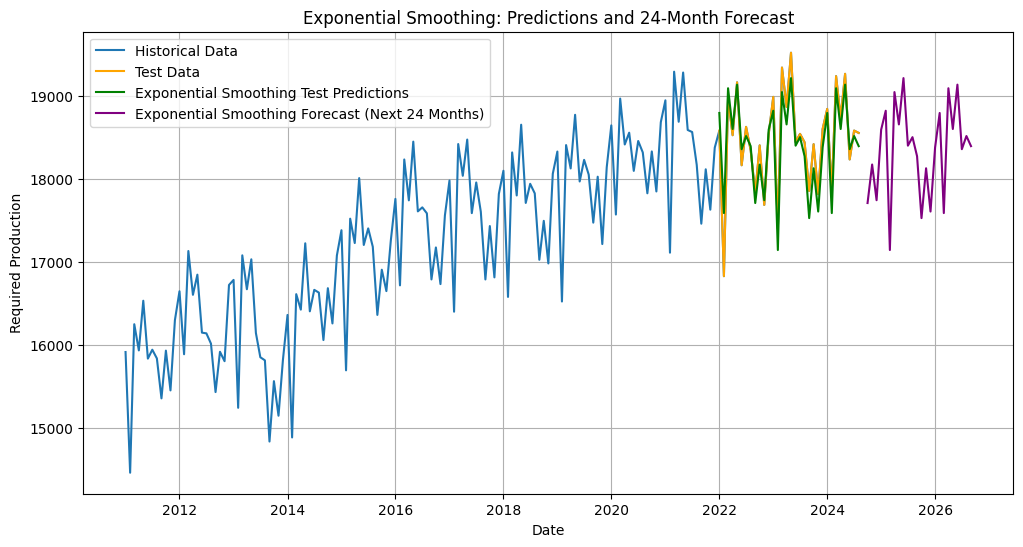

Exponential Smoothing Forecasted Values (Next 24 Months):
2024-09-01    17709.089434
2024-10-01    18173.151071
2024-11-01    17743.134426
2024-12-01    18593.130632
2025-01-01    18820.866253
2025-02-01    17142.780120
2025-03-01    19045.905897
2025-04-01    18656.243920
2025-05-01    19214.230474
2025-06-01    18400.262389
2025-07-01    18502.722975
2025-08-01    18272.996709
2025-09-01    17527.402233
2025-10-01    18127.909894
2025-11-01    17606.593102
2025-12-01    18379.813019
2026-01-01    18794.189186
2026-02-01    17588.044987
2026-03-01    19092.105730
2026-04-01    18600.890983
2026-05-01    19135.445257
2026-06-01    18357.736123
2026-07-01    18516.304934
2026-08-01    18394.594561
Freq: MS, dtype: float64


In [31]:
# Step 3: Fit the Exponential Smoothing model on the training data
model_exp = ExponentialSmoothing(train_series, seasonal='add', seasonal_periods=24)
model_exp_fit = model_exp.fit()

# Step 4: Predict on the test set
test_predictions = model_exp_fit.forecast(steps=len(test_series))

# Step 5: Evaluate the model
mae = mean_absolute_error(test_series, test_predictions)
mse = mean_squared_error(test_series, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_series - test_predictions) / test_series)) * 100

print("Exponential Smoothing Model Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Step 6: Forecast the next 24 months
forecast_exp = model_exp_fit.forecast(steps=len(test_series) + 24)[-24:]

# Step 7: Visualize the results
plt.figure(figsize=(12, 6))

# Historical data
plt.plot(df['Required Production'], label='Historical Data')

# Test predictions
plt.plot(test_series.index, test_series, label='Test Data', color='orange')
plt.plot(test_series.index, test_predictions, label='Exponential Smoothing Test Predictions', color='green')

# 24-month forecast
forecast_index = pd.date_range(start=test_series.index[-1], periods=25, freq='M')[1:]  # Generate future dates
plt.plot(forecast_index, forecast_exp, label='Exponential Smoothing Forecast (Next 24 Months)', color='purple')

plt.title('Exponential Smoothing: Predictions and 24-Month Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Required Production')
plt.grid()
plt.show()

# Step 8: Display forecasted values
print("Exponential Smoothing Forecasted Values (Next 24 Months):")
print(forecast_exp)


# Forecasting with Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/3glvxzfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/jk3ajlfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93880', 'data', 'file=/tmp/tmp9v2t59hb/3glvxzfy.json', 'init=/tmp/tmp9v2t59hb/jk3ajlfv.json', 'output', 'file=/tmp/tmp9v2t59hb/prophet_modellx4ih2ac/prophet_model-20241210203629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

Prophet Model Evaluation on Test Set:
MAE: 431.61
MSE: 283559.43
RMSE: 532.50
MAPE: 2.36%


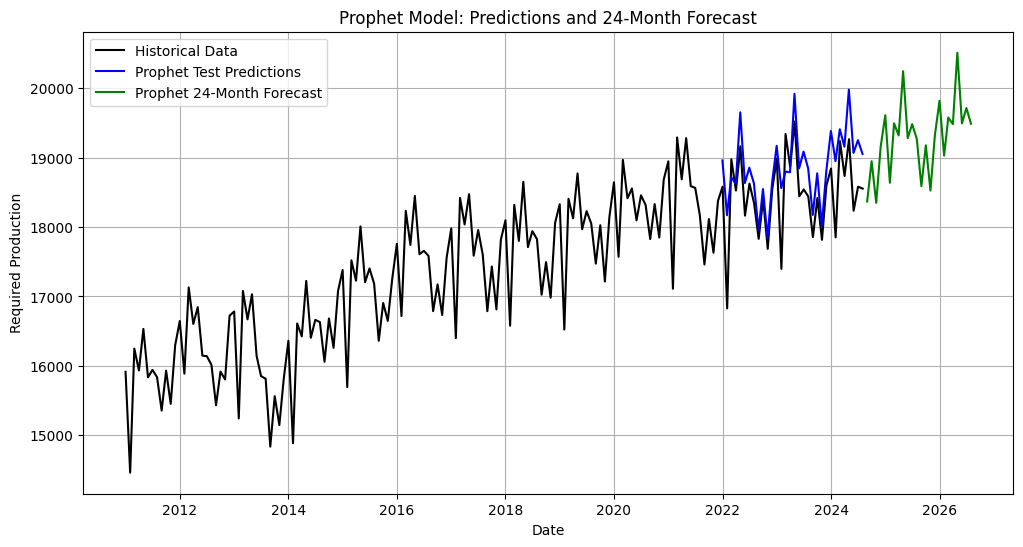

Prophet Forecasted Values (Next 24 Months):
            ds          yhat
164 2024-08-31  18367.419081
165 2024-09-30  18948.952336
166 2024-10-31  18348.604003
167 2024-11-30  19157.066503
168 2024-12-31  19610.858189
169 2025-01-31  18637.898101
170 2025-02-28  19494.878560
171 2025-03-31  19319.582586
172 2025-04-30  20245.874891
173 2025-05-31  19280.096047
174 2025-06-30  19483.323635
175 2025-07-31  19270.735414
176 2025-08-31  18589.534864
177 2025-09-30  19178.045730
178 2025-10-31  18525.475721
179 2025-11-30  19324.859096
180 2025-12-31  19819.004363
181 2026-01-31  19029.382050
182 2026-02-28  19577.939161
183 2026-03-31  19483.211472
184 2026-04-30  20511.876287
185 2026-05-31  19492.507050
186 2026-06-30  19714.900842
187 2026-07-31  19487.888942


In [32]:
prophet_data = df.reset_index()[['Date', 'Required Production']]
prophet_data.columns = ['ds', 'y']

# Step 2: Split the data into train and test sets (80%-20%)
test_size = int(len(prophet_data) * 0.2)
train_prophet = prophet_data[:-test_size]  # Training data
test_prophet = prophet_data[-test_size:]  # Test data

# Step 3: Fit the Prophet model on the training data
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Step 4: Make predictions for the test set
future_test = model_prophet.make_future_dataframe(periods=test_size, freq='M')
forecast_test = model_prophet.predict(future_test)

# Extract test predictions
test_predictions = forecast_test[['ds', 'yhat']].iloc[-test_size:]
test_actual = test_prophet['y'].values

# Step 5: Evaluate the model
mae = mean_absolute_error(test_actual, test_predictions['yhat'])
mse = mean_squared_error(test_actual, test_predictions['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_actual - test_predictions['yhat']) / test_actual)) * 100

print("Prophet Model Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Step 6: Forecast the next 24 months
future_forecast = model_prophet.make_future_dataframe(periods=test_size + 24, freq='M')
forecast_future = model_prophet.predict(future_forecast)

# Extract the next 24-month forecast
forecast_24_months = forecast_future[['ds', 'yhat']].iloc[-24:]

# Step 7: Visualize results
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='black')

# Plot test predictions
plt.plot(test_predictions['ds'], test_predictions['yhat'], label='Prophet Test Predictions', color='blue')

# Plot 24-month forecast
plt.plot(forecast_24_months['ds'], forecast_24_months['yhat'], label='Prophet 24-Month Forecast', color='green')

plt.title('Prophet Model: Predictions and 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Required Production')
plt.legend()
plt.grid()
plt.show()

# Step 8: Display forecasted values
print("Prophet Forecasted Values (Next 24 Months):")
print(forecast_24_months)


In [33]:
# Combine forecasts into a single DataFrame
combined_forecasts = pd.DataFrame({
    'Date': forecast_24_months['ds'],
    'ARIMA Forecast': forecast_arima.values[:len(forecast_24_months)],  # Slice to match length
    'Exponential Smoothing Forecast': forecast_exp.values[:len(forecast_24_months)],  # Slice to match length
    'Prophet Forecast': forecast_24_months['yhat'].values
})

# Display combined forecast DataFrame
combined_forecasts

,Date,ARIMA Forecast,Exponential Smoothing Forecast,Prophet Forecast
164,2024-08-31,17389.833640,17709.089434,18367.419081
165,2024-09-30,17381.507792,18173.151071,18948.952336
166,2024-10-31,17370.656979,17743.134426,18348.604003
167,2024-11-30,17367.258368,18593.130632,19157.066503
168,2024-12-31,17355.428080,18820.866253,19610.858189
169,2025-01-31,17351.874785,17142.780120,18637.898101
170,2025-02-28,17343.033258,19045.905897,19494.878560
171,2025-03-31,17336.943392,18656.243920,19319.582586
172,2025-04-30,17331.563416,19214.230474,20245.874891
173,2025-05-31,17323.871106,18400.262389,19280.096047


In [34]:
# Define weights for the hybrid model
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3


# Combine test set predictions using weights
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)


test_predictions_hybrid = test_predictions_hybrid[:len(test_series)]

# Assuming test_series and test_predictions_hybrid now have the same length
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'][:len(test_series)] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'][:len(test_series)] +
    w_prophet * combined_forecasts['Prophet Forecast'][:len(test_series)]
)

# Or, if the first 24 values in test_series need to be used:
test_series_subset = test_series[:len(test_predictions_hybrid)]
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)

# Evaluate hybrid predictions on the test set (using the appropriate subset of test_series)
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)
mse_hybrid = mean_squared_error(test_series_subset, test_predictions_hybrid)
rmse_hybrid = np.sqrt(mse_hybrid)

# Align indices before applying the boolean mask
test_predictions_hybrid = test_predictions_hybrid.reset_index(drop=True)
test_series_subset = test_series_subset.reset_index(drop=True)

non_zero_indices = test_series_subset != 0
mape_hybrid = np.mean(np.abs((test_series_subset[non_zero_indices] - test_predictions_hybrid[non_zero_indices]) / test_series_subset[non_zero_indices])) * 100


print("Hybrid Model Evaluation on Test Set:")
print(f"MAE: {mae_hybrid:.2f}")
print(f"MSE: {mse_hybrid:.2f}")
print(f"RMSE: {rmse_hybrid:.2f}")
print(f"MAPE: {mape_hybrid:.2f}%")


Hybrid Model Evaluation on Test Set:
MAE: 616.81
MSE: 564616.34
RMSE: 751.41
MAPE: 3.35%


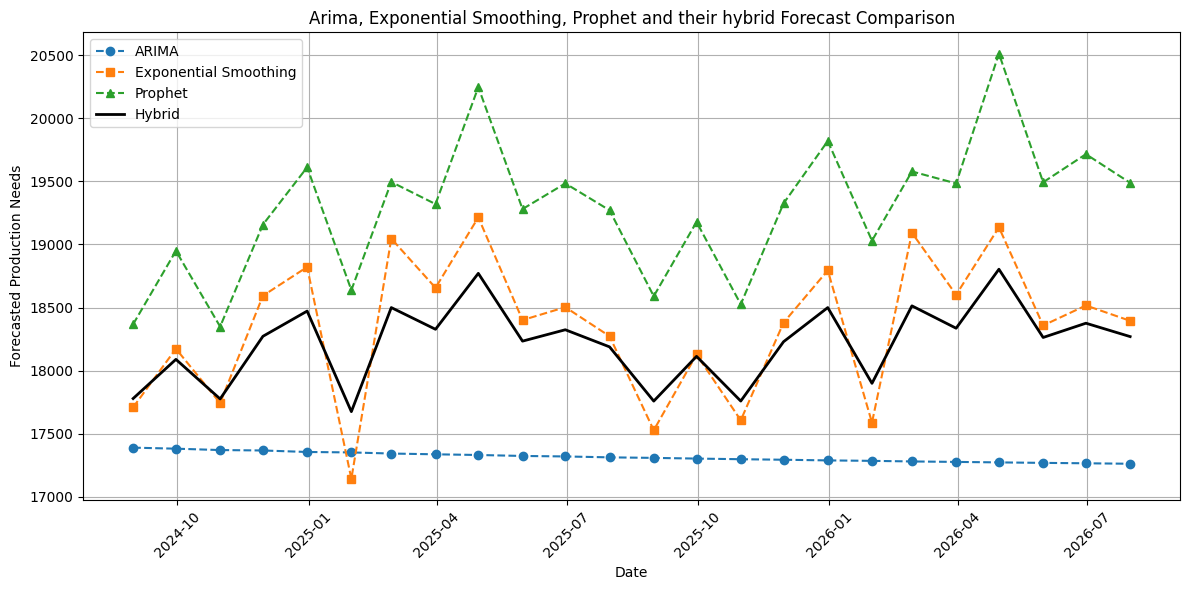

In [35]:
# Hybrid forecast as weighted average
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3
combined_forecasts['Hybrid'] = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)

# Plot hybrid and individual forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA', linestyle='--', marker='o')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing', linestyle='--', marker='s')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet', linestyle='--', marker='^')
plt.plot(combined_forecasts['Date'], combined_forecasts['Hybrid'], label='Hybrid', linestyle='-', linewidth=2, color='black')

plt.title('Arima, Exponential Smoothing, Prophet and their hybrid Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Production Needs')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


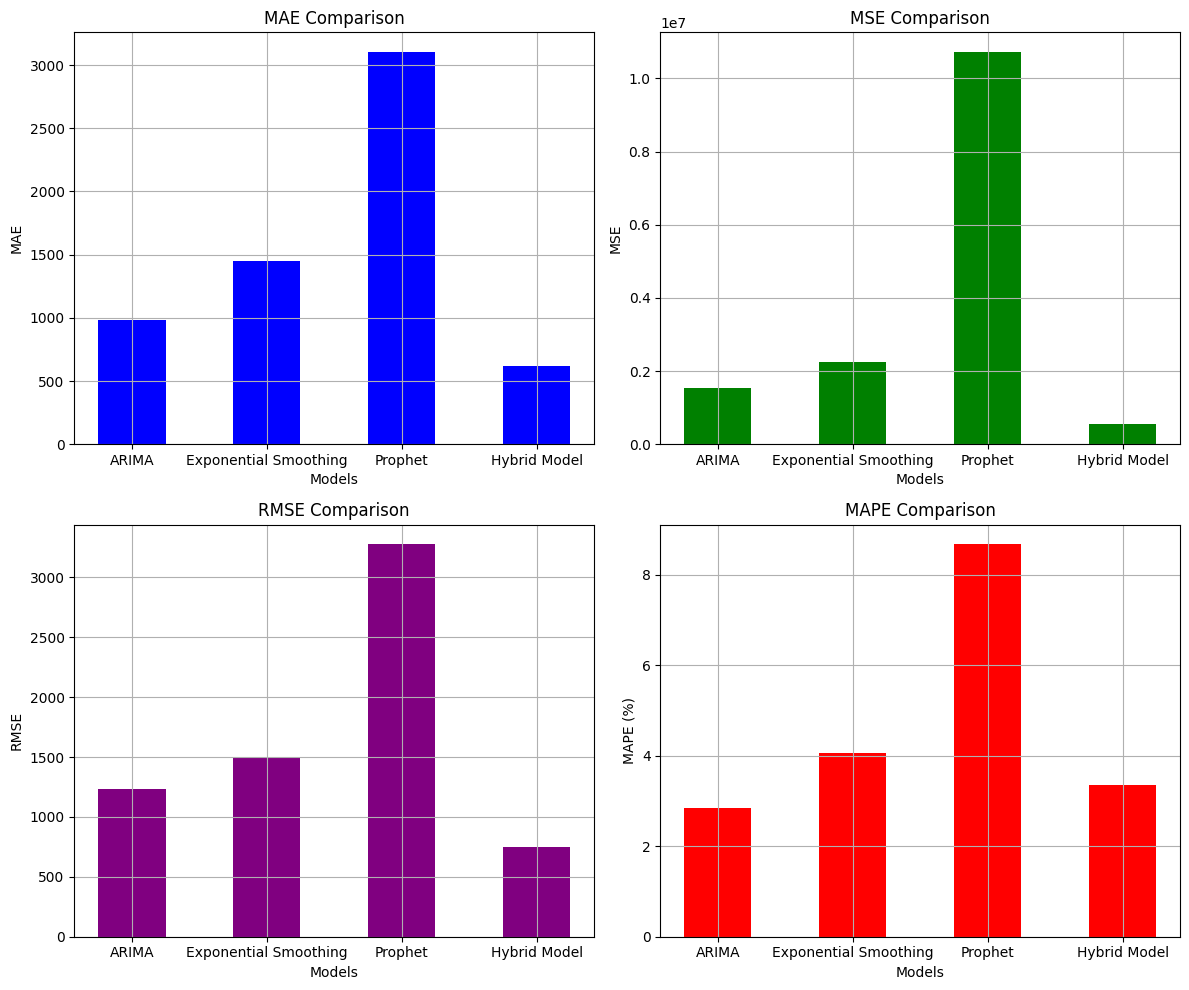

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['ARIMA', 'Exponential Smoothing', 'Prophet', 'Hybrid Model']
mae_values = [mae_arima, mae_exp, mae_prophet, mae_hybrid]
mse_values = [mse_arima, mse_exp, mse_prophet, mse_hybrid]
rmse_values = [rmse_arima, rmse_exp, rmse_prophet, rmse_hybrid]
mape_values = [mape_arima, mape_exp, mape_prophet, mape_hybrid]

# Set positions for the bars
x = np.arange(len(models))
width = 0.5

# Create plots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot MAE
axes[0, 0].bar(x, mae_values, width, color='blue')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].grid(True)

# Plot MSE
axes[0, 1].bar(x, mse_values, width, color='green')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].grid(True)

# Plot RMSE
axes[1, 0].bar(x, rmse_values, width, color='purple')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models)
axes[1, 0].grid(True)

# Plot MAPE
axes[1, 1].bar(x, mape_values, width, color='red')
axes[1, 1].set_title('MAPE Comparison')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Supply-Demand Analysis

In [37]:
# Calculate the total demand as sum of farm use, imports, and domestic disappearance
df['Demand'] = df['Farm use'] + df['Imports'] + df['Domestic disappearance']

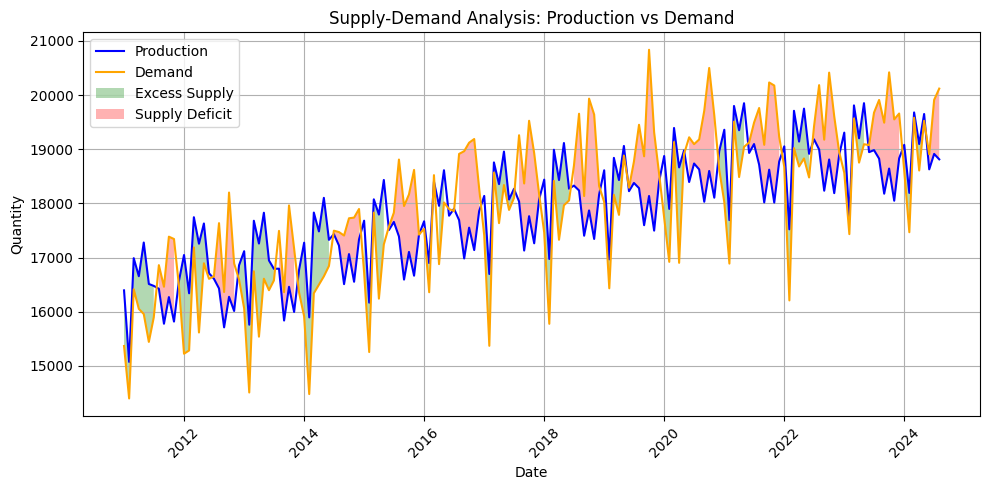

In [38]:
# Visualize the Supply-Demand Analysis
plt.figure(figsize=(10, 5))
plt.plot(df['Production'], label='Production', color='blue')
plt.plot(df['Demand'], label='Demand', color='orange')

# Plot excess or deficit of production
plt.fill_between(df.index, df['Production'], df['Demand'], where=(df['Production'] > df['Demand']),
                 facecolor='green', alpha=0.3, label='Excess Supply')
plt.fill_between(df.index, df['Production'], df['Demand'], where=(df['Production'] < df['Demand']),
                 facecolor='red', alpha=0.3, label='Supply Deficit')

plt.title('Supply-Demand Analysis: Production vs Demand')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating the Supply-Demand Ratio

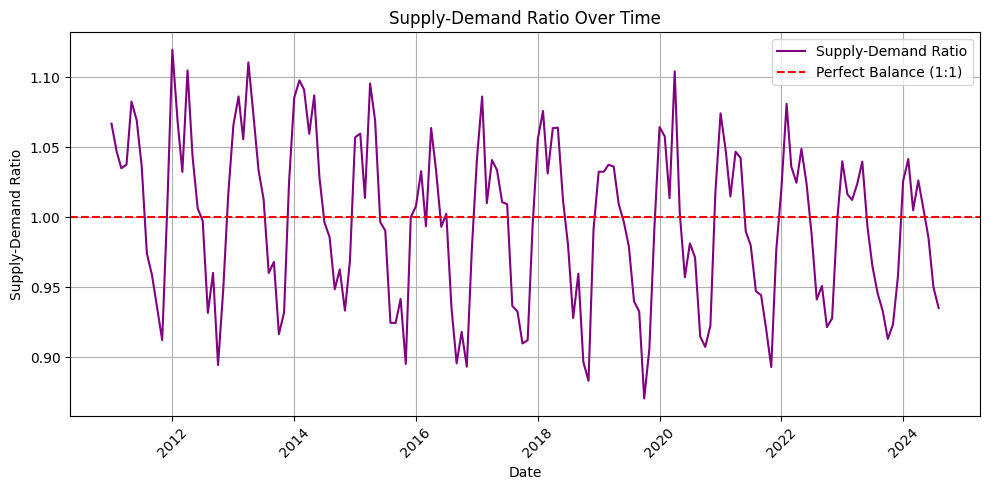

In [39]:
# Calculate the Supply-Demand Ratio
df['Supply-Demand Ratio'] = df['Production'] / df['Demand']

# Plot the Supply-Demand Ratio
plt.figure(figsize=(10, 5))
plt.plot(df['Supply-Demand Ratio'], label='Supply-Demand Ratio', color='purple')
plt.axhline(y=1, color='red', linestyle='--', label='Perfect Balance (1:1)')
plt.title('Supply-Demand Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Supply-Demand Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [40]:
# Show a summary of how often production exceeds or falls short of demand
excess_supply_count = len(df[df['Production'] > df['Demand']])
supply_deficit_count = len(df[df['Production'] < df['Demand']])

print(f"Excess Supply: {excess_supply_count} periods")
print(f"Supply Deficit: {supply_deficit_count} periods")



Excess Supply: 84 periods
Supply Deficit: 80 periods


In [41]:
# Display the last few rows for the Supply-Demand Ratio
print(df[['Production', 'Demand', 'Supply-Demand Ratio']].tail())

            Production   Demand  Supply-Demand Ratio
Date                                                
2024-04-01       19098  18609.0             1.026278
2024-05-01       19652  19527.0             1.006401
2024-06-01       18630  18908.0             0.985297
2024-07-01       18915  19913.0             0.949882
2024-08-01       18815  20121.0             0.935093


# Forecast Production with ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-42-3b7fba0b739f>:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use

Mean Squared Error on Test Set: 1841953.881061256


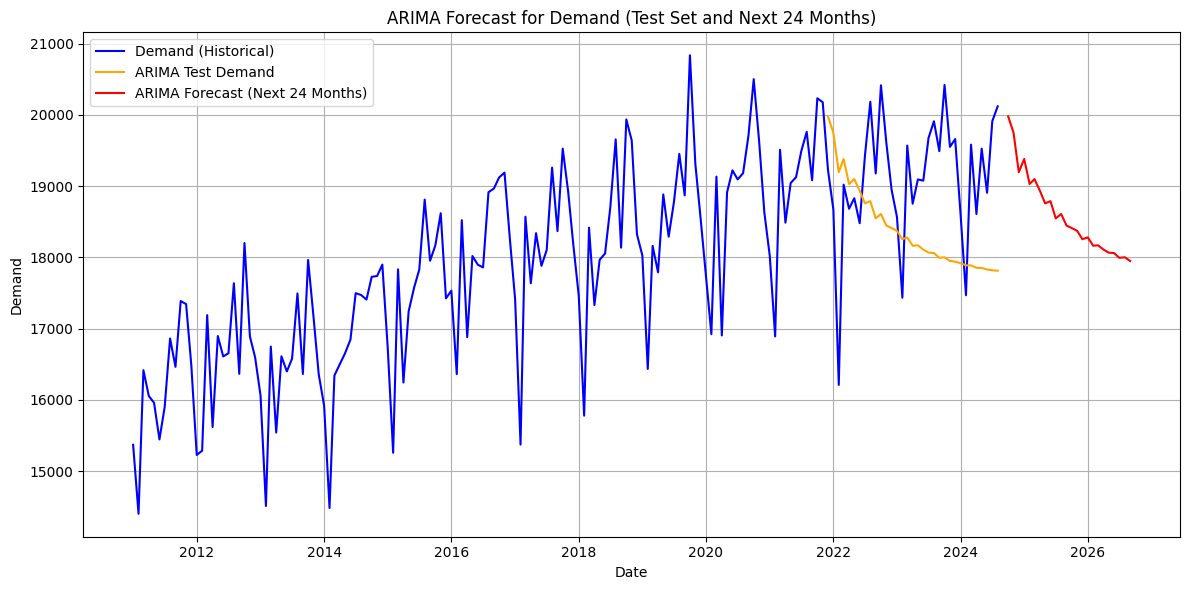

In [42]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train, test = df['Demand'][:train_size], df['Demand'][train_size:]

# ARIMA Forecasting Function
def arima_forecast(train_series, test_series, order=(5, 0, 1)):
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Predict on the test set
    predictions = model_fit.predict(start=test_series.index[0], end=test_series.index[-1], typ='levels')

    # Forecast the next 24 months
    # The 'steps' argument is used here in the forecast method
    forecast = model_fit.forecast(steps=24)

    return predictions, forecast

# Make predictions on the test set and forecast next 24 months
arima_predictions, arima_forecast_values = arima_forecast(train, test)

# Calculate Mean Squared Error for model performance evaluation on the test set
mse = mean_squared_error(test, arima_predictions)
print(f"Mean Squared Error on Test Set: {mse}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot historical data and test predictions
plt.plot(df['Demand'], label='Demand (Historical)', color='blue')
plt.plot(test.index, arima_predictions, label='ARIMA Test Demand', color='orange')

# Forecast the next 24 months
plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], arima_forecast_values, label='ARIMA Forecast (Next 24 Months)', color='red')

# Formatting the plot
plt.title('ARIMA Forecast for Demand (Test Set and Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, RMSE, and MAPE
mae = mean_absolute_error(test, arima_predictions)
mse = mean_squared_error(test, arima_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - arima_predictions) / test)) * 100

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 1170.9106047266278
Mean Squared Error (MSE): 1841953.881061256
Root Mean Squared Error (RMSE): 1357.1860156445969
Mean Absolute Percentage Error (MAPE): 6.102920164549883%


# Forecast Production with Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-44-e1d0f7c3f7e1>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_forecast_dates = pd.date_range(test.index[-1], periods=25, freq='M')[1:]


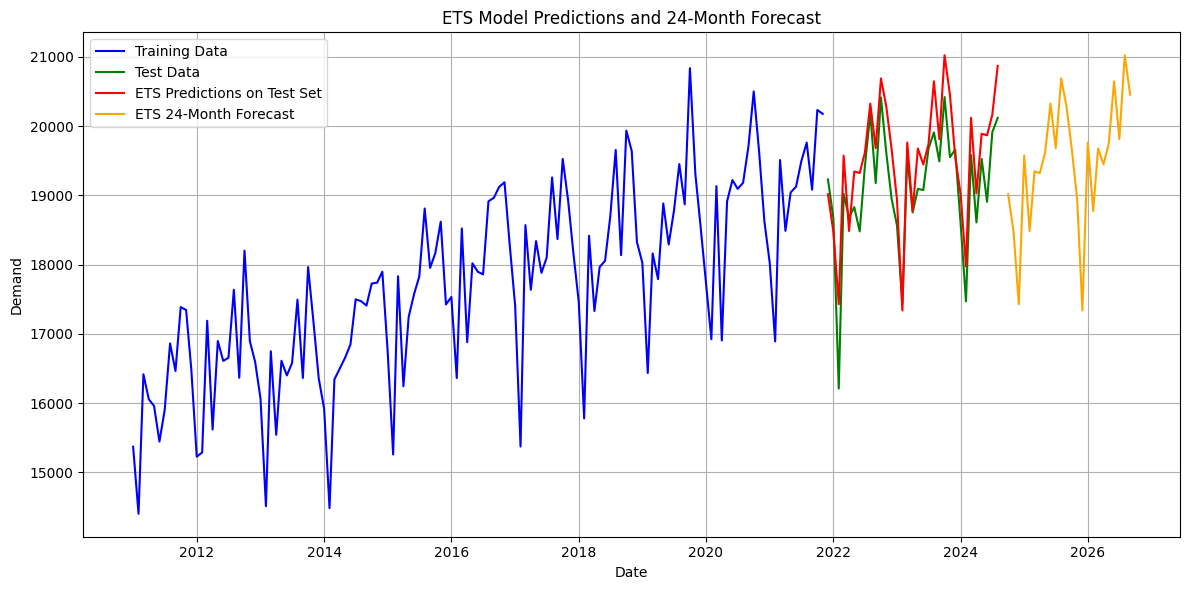

Mean Absolute Error (MAE): 449.4354995739355
Mean Squared Error (MSE): 282893.51357334125
Root Mean Squared Error (RMSE): 531.8773482423755
Mean Absolute Percentage Error (MAPE): 2.376034505267922%


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Split the data (e.g., 80% training, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Demand'][:train_size], df['Demand'][train_size:]

# Exponential Smoothing (ETS) Forecasting
def ets_forecast(series, steps=24, seasonal_periods=24):
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast, model_fit

# Fit ETS model on the training data
ets_forecast_values, ets_model_fit = ets_forecast(train, steps=len(test), seasonal_periods=24)

# Predict on the test set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, ets_forecast_values, label='ETS Predictions on Test Set', color='red')

# Forecast the next 24 months (after the test set)
future_forecast = ets_model_fit.forecast(steps=24)
future_forecast_dates = pd.date_range(test.index[-1], periods=25, freq='M')[1:]

# Plot the 24-month forecast on the same plot
plt.plot(future_forecast_dates, future_forecast, label='ETS 24-Month Forecast', color='orange')

# Formatting the plot
plt.title('ETS Model Predictions and 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MAE, MSE, RMSE, and MAPE for the test set
mae = mean_absolute_error(test, ets_forecast_values)
mse = mean_squared_error(test, ets_forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - ets_forecast_values) / test)) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


# Forecast Production with Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/7va2aado.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9v2t59hb/cqss66d6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31322', 'data', 'file=/tmp/tmp9v2t59hb/7va2aado.json', 'init=/tmp/tmp9v2t59hb/cqss66d6.json', 'output', 'file=/tmp/tmp9v2t59hb/prophet_model3i3_7ktt/prophet_model-20241210203943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

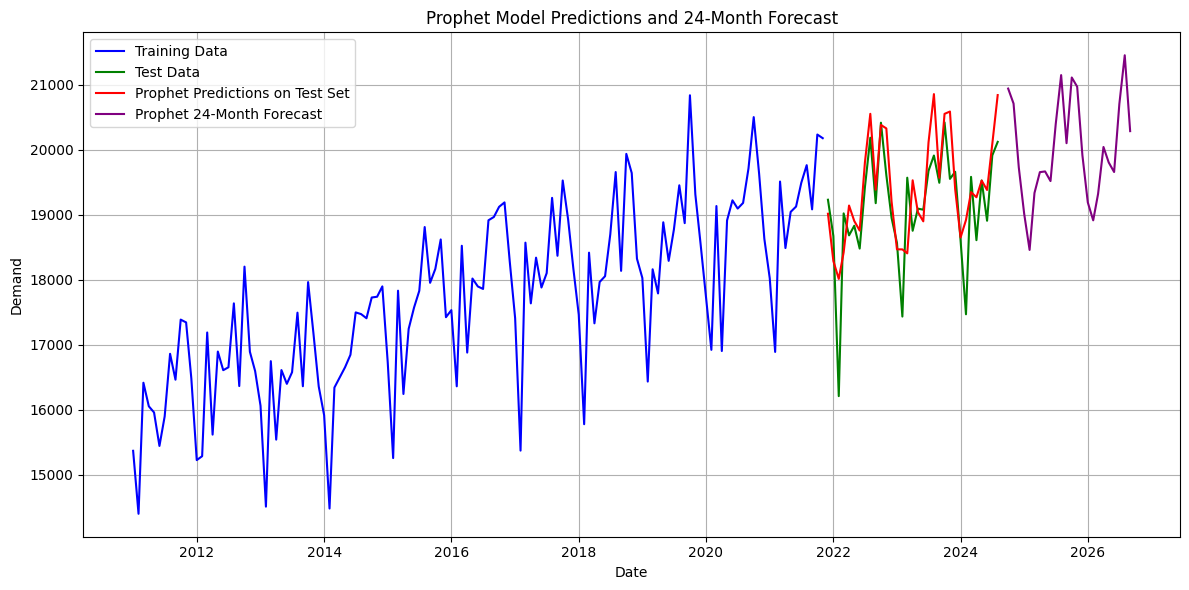

Mean Absolute Error (MAE): 476.97699644137197
Mean Squared Error (MSE): 415061.52228674584
Root Mean Squared Error (RMSE): 644.2526851218751
Mean Absolute Percentage Error (MAPE): 2.5624043092439015%


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
from prophet import Prophet

# Split the data (e.g., 80% training, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Demand'][:train_size], df['Demand'][train_size:]

# Prophet Forecasting
def prophet_forecast(series, steps=24):
    df_prophet = series.reset_index().rename(columns={'Date': 'ds', 'Demand': 'y'})

    model = Prophet()
    model.fit(df_prophet)

    # Generate future dates for the forecast period
    future = model.make_future_dataframe(periods=steps, freq='M')  # Assuming monthly data
    forecast = model.predict(future)

    return forecast['yhat'][-steps:], model

# Fit Prophet model on the training data
prophet_forecast_values, prophet_model_fit = prophet_forecast(train, steps=len(test))

# Predict on the test set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, prophet_forecast_values, label='Prophet Predictions on Test Set', color='red')

# Forecast the next 24 months (after the test set)
# Create a dataframe with 'ds' column for future dates
future_forecast_df = pd.DataFrame({'ds': pd.date_range(test.index[-1], periods=25, freq='M')[1:]})
future_forecast_prophet = prophet_model_fit.predict(future_forecast_df) # Predict using the dataframe
#future_forecast_dates_prophet = pd.date_range(test.index[-1], periods=25, freq='M')[1:]

# Plot the 24-month Prophet forecast on the same plot
plt.plot(future_forecast_prophet['ds'], future_forecast_prophet['yhat'], label='Prophet 24-Month Forecast', color='purple')

# Formatting the plot
plt.title('Prophet Model Predictions and 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MAE, MSE, RMSE, and MAPE for the test set
mae = mean_absolute_error(test, prophet_forecast_values)
mse = mean_squared_error(test, prophet_forecast_values)
rmse = np.sqrt(mse)

# Handle zero values in the test set for MAPE calculation
# Align indices before applying the boolean mask
test_reset_index = test.reset_index(drop=True)  # Reset index of test Series
prophet_forecast_values_reset_index = prophet_forecast_values.reset_index(drop=True) #Reset index of prophet_forecast_values Series
non_zero_indices = test_reset_index != 0 #Create non_zero_indices from the reset index
mape = np.mean(np.abs((test_reset_index[non_zero_indices] - prophet_forecast_values_reset_index[non_zero_indices]) / test_reset_index[non_zero_indices])) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

In [46]:
# Combine forecasts into a single DataFrame
combined_forecasts = pd.DataFrame({
    'Date': future_forecast_prophet['ds'],
    'ARIMA Forecast': arima_forecast_values.values[:len(forecast_24_months)],  # Slice to match length
    'Exponential Smoothing Forecast': future_forecast.values[:len(forecast_24_months)],  # Slice to match length
    'Prophet Forecast': future_forecast_prophet['yhat'].values
})

# Display combined forecast DataFrame
combined_forecasts


,Date,ARIMA Forecast,Exponential Smoothing Forecast,Prophet Forecast
0,2024-09-30,19980.373023,19016.379243,20940.898016
1,2024-10-31,19749.314800,18475.592954,20710.372564
2,2024-11-30,19195.965341,17428.215487,19728.518781
3,2024-12-31,19381.840396,19575.484042,19013.638742
4,2025-01-31,19030.368211,18485.592065,18459.129761
5,2025-02-28,19099.290551,19345.734136,19334.919938
6,2025-03-31,18936.955873,19323.105041,19655.532931
7,2025-04-30,18758.924645,19620.241127,19666.213635
8,2025-05-31,18789.451454,20326.263561,19518.144424
9,2025-06-30,18547.682396,19681.998248,20396.036388


In [47]:
# Define weights for the hybrid model
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3


# Combine test set predictions using weights
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)


test_predictions_hybrid = test_predictions_hybrid[:len(test_series)]  # Adjust if needed

# Assuming test_series and test_predictions_hybrid now have the same length
test_predictions_hybrid = (
    w_arima * combined_forecasts['ARIMA Forecast'][:len(test_series)] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'][:len(test_series)] +
    w_prophet * combined_forecasts['Prophet Forecast'][:len(test_series)]
)

# Or, if the first 24 values in test_series need to be used:
test_series_subset = test_series[:len(test_predictions_hybrid)]
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)

# Evaluate hybrid predictions on the test set (using the appropriate subset of test_series)
mae_hybrid = mean_absolute_error(test_series_subset, test_predictions_hybrid)  # Use the subset
mse_hybrid = mean_squared_error(test_series_subset, test_predictions_hybrid)
rmse_hybrid = np.sqrt(mse_hybrid)

# Align indices before applying the boolean mask
test_predictions_hybrid = test_predictions_hybrid.reset_index(drop=True)
test_series_subset = test_series_subset.reset_index(drop=True)

non_zero_indices = test_series_subset != 0
mape_hybrid = np.mean(np.abs((test_series_subset[non_zero_indices] - test_predictions_hybrid[non_zero_indices]) / test_series_subset[non_zero_indices])) * 100


print("Hybrid Model Evaluation on Test Set:")
print(f"MAE: {mae_hybrid:.2f}")
print(f"MSE: {mse_hybrid:.2f}")
print(f"RMSE: {rmse_hybrid:.2f}")
print(f"MAPE: {mape_hybrid:.2f}%")



Hybrid Model Evaluation on Test Set:
MAE: 1074.25
MSE: 1593003.36
RMSE: 1262.14
MAPE: 5.94%


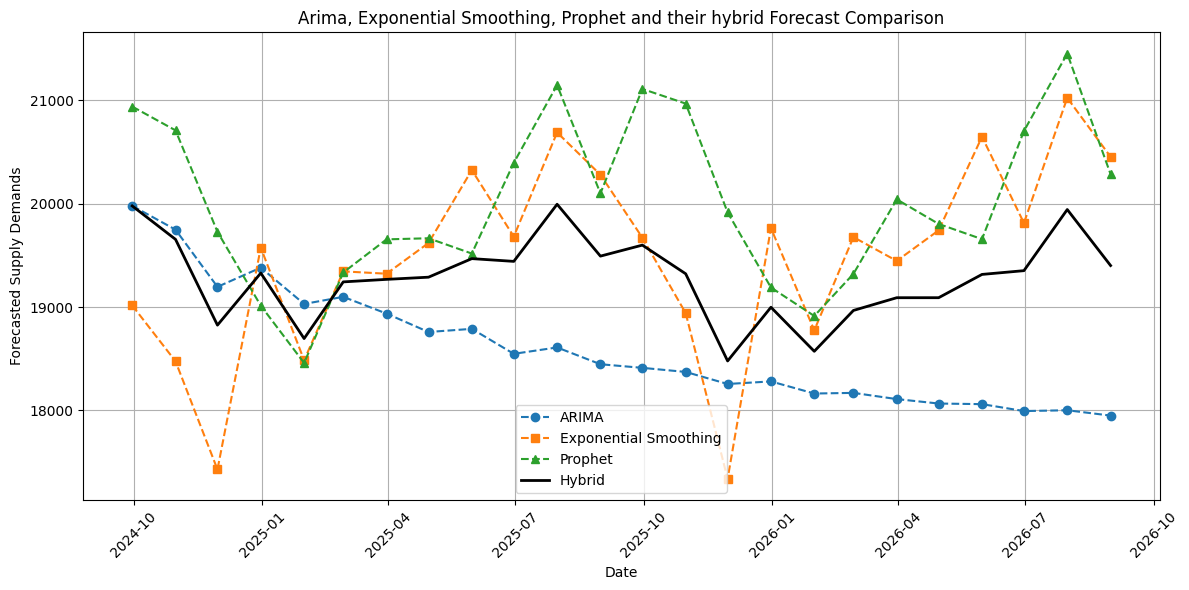

In [48]:
# Hybrid forecast as weighted average
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3
combined_forecasts['Hybrid'] = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)

# Plot hybrid and individual forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA', linestyle='--', marker='o')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing', linestyle='--', marker='s')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet', linestyle='--', marker='^')
plt.plot(combined_forecasts['Date'], combined_forecasts['Hybrid'], label='Hybrid', linestyle='-', linewidth=2, color='black')

plt.title('Arima, Exponential Smoothing, Prophet and their hybrid Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Supply Demands')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

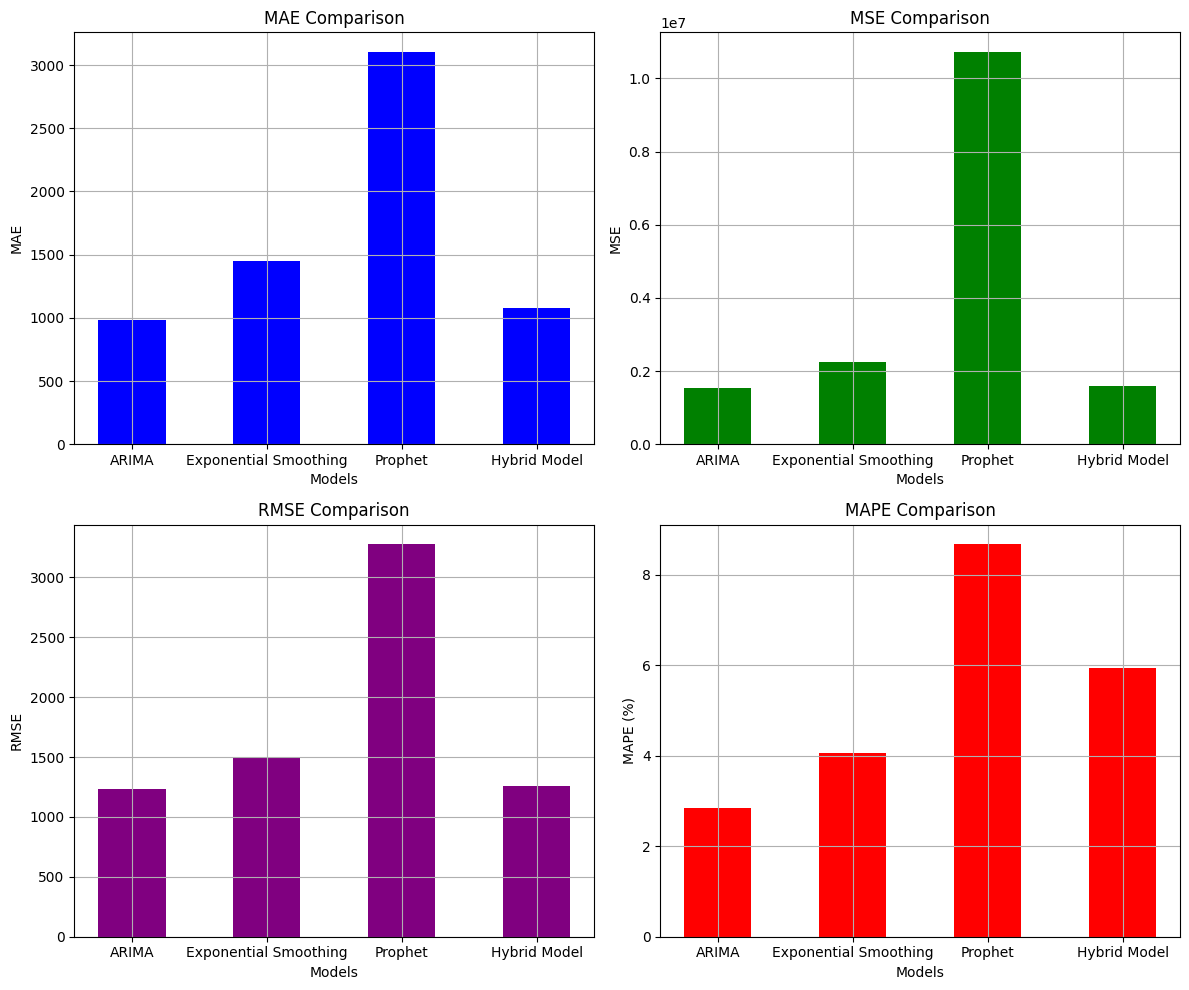

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['ARIMA', 'Exponential Smoothing', 'Prophet', 'Hybrid Model']
mae_values = [mae_arima, mae_exp, mae_prophet, mae_hybrid]
mse_values = [mse_arima, mse_exp, mse_prophet, mse_hybrid]
rmse_values = [rmse_arima, rmse_exp, rmse_prophet, rmse_hybrid]
mape_values = [mape_arima, mape_exp, mape_prophet, mape_hybrid]

# Set positions for the bars
x = np.arange(len(models))
width = 0.5

# Create plots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot MAE
axes[0, 0].bar(x, mae_values, width, color='blue')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].grid(True)

# Plot MSE
axes[0, 1].bar(x, mse_values, width, color='green')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].grid(True)

# Plot RMSE
axes[1, 0].bar(x, rmse_values, width, color='purple')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models)
axes[1, 0].grid(True)

# Plot MAPE
axes[1, 1].bar(x, mape_values, width, color='red')
axes[1, 1].set_title('MAPE Comparison')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Inventory Optimization

In [48]:
# Target: Ending Stocks
y = df['Ending stocks']


In [49]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity with ADF test
adf_test = adfuller(y)
print(f"ADF Statistic: {adf_test[0]:.4f}, p-value: {adf_test[1]:.4f}")

ADF Statistic: -1.8867, p-value: 0.3383


In [50]:
# If non-stationary (p-value > 0.05), take differences
if adf_test[1] > 0.05:
    y_diff = y.diff().dropna()
else:
    y_diff = y

# Fit ARIMA model
arima_model = ARIMA(y, order=(5, 0, 1))  # Adjust order after testing
arima_fitted = arima_model.fit()

# Forecast for the next 24 months
arima_forecast = arima_fitted.forecast(steps=24)
print("ARIMA Forecast:")
print(arima_forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Forecast:
2024-09-01    16256.804577
2024-10-01    15703.327818
2024-11-01    15361.825676
2024-12-01    15162.159284
2025-01-01    15089.164474
2025-02-01    15100.831338
2025-03-01    15141.943312
2025-04-01    15193.635559
2025-05-01    15231.456487
2025-06-01    15252.234312
2025-07-01    15257.207775
2025-08-01    15250.465998
2025-09-01    15238.851999
2025-10-01    15226.316980
2025-11-01    15216.137519
2025-12-01    15209.427912
2026-01-01    15206.037178
2026-02-01    15205.255706
2026-03-01    15205.983851
2026-04-01    15207.347751
2026-05-01    15208.692477
2026-06-01    15209.673989
2026-07-01    15210.203770
2026-08-01    15210.335854
Freq: MS, Name: predicted_mean, dtype: float64


In [51]:
# Fit the Exponential Smoothing model
es_model = ExponentialSmoothing(
    y, trend='add', seasonal=None, initialization_method='estimated'
)
es_fitted = es_model.fit()

# Forecast for the next 24 months
es_forecast = es_fitted.forecast(steps=24)
print("Exponential Smoothing Forecast:")
print(es_forecast)


Exponential Smoothing Forecast:
2024-09-01    16184.609640
2024-10-01    15519.068655
2024-11-01    14853.527670
2024-12-01    14187.986685
2025-01-01    13522.445701
2025-02-01    12856.904716
2025-03-01    12191.363731
2025-04-01    11525.822746
2025-05-01    10860.281761
2025-06-01    10194.740776
2025-07-01     9529.199791
2025-08-01     8863.658806
2025-09-01     8198.117821
2025-10-01     7532.576836
2025-11-01     6867.035851
2025-12-01     6201.494867
2026-01-01     5535.953882
2026-02-01     4870.412897
2026-03-01     4204.871912
2026-04-01     3539.330927
2026-05-01     2873.789942
2026-06-01     2208.248957
2026-07-01     1542.707972
2026-08-01      877.166987
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
# Prepare data for Prophet
prophet_data = df.reset_index()[['Date', 'Ending stocks']].rename(columns={'Date': 'ds', 'Ending stocks': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Create a future dataframe for the next 24 months
future = prophet_model.make_future_dataframe(periods=24, freq='M')

# Forecast
prophet_forecast = prophet_model.predict(future)
print("Prophet Forecast:")
print(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqa7f7ja0/0gmhlpy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqa7f7ja0/9ml5nkfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39691', 'data', 'file=/tmp/tmpqa7f7ja0/0gmhlpy9.json', 'init=/tmp/tmpqa7f7ja0/9ml5nkfq.json', 'output', 'file=/tmp/tmpqa7f7ja0/prophet_modeljmyky5ex/prophet_model-20241210120123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

Prophet Forecast:
            ds          yhat    yhat_lower    yhat_upper
176 2025-08-31  15703.302765  14811.223648  16658.984617
177 2025-09-30  14454.321548  13591.693340  15417.785669
178 2025-10-31  12878.774095  11948.277104  13848.476762
179 2025-11-30  12799.109622  11936.127689  13751.416410
180 2025-12-31  14246.693845  13327.489783  15207.247510
181 2026-01-31  15414.884088  14501.726236  16326.464277
182 2026-02-28  15335.429695  14348.699857  16296.261883
183 2026-03-31  15620.723878  14686.896432  16590.257537
184 2026-04-30  17288.910052  16381.648839  18240.737542
185 2026-05-31  17744.419986  16796.720243  18694.273600
186 2026-06-30  17549.095512  16605.795837  18508.683633
187 2026-07-31  16242.625983  15340.060428  17185.271085


<ipython-input-53-4e6e8ecd23b7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')


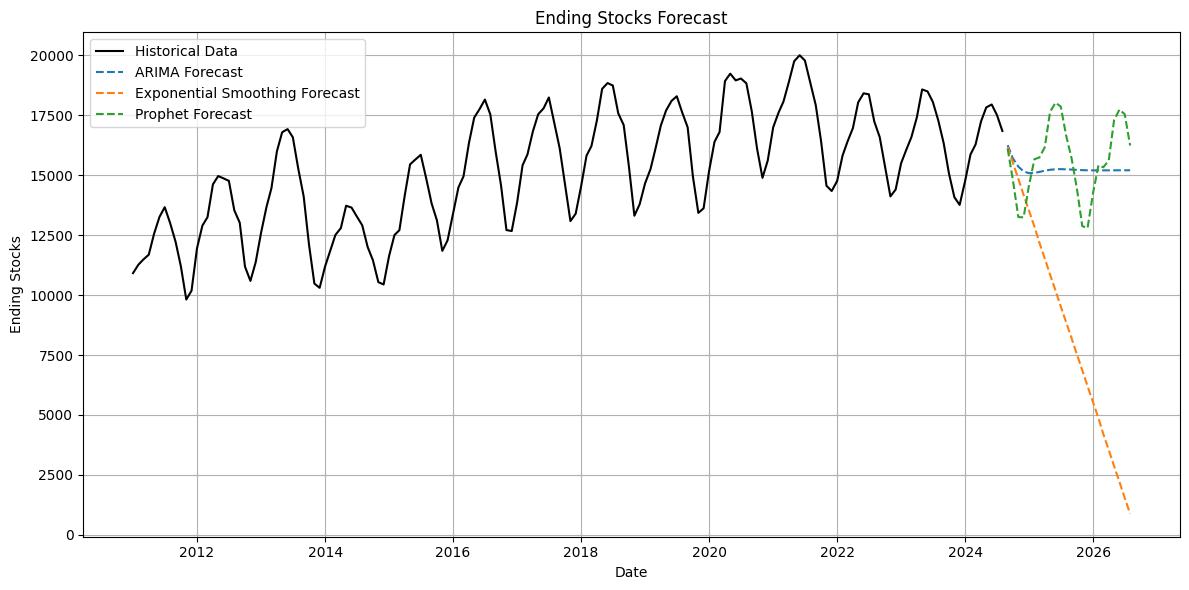

In [53]:
# Combine forecasts into a single DataFrame
forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')
combined_forecast = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast.values,
    'Exponential Smoothing': es_forecast.values,
    'Prophet': prophet_forecast.set_index('ds')['yhat'][-24:].values
})

# Plot original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(y, label='Historical Data', color='black')
plt.plot(forecast_dates, combined_forecast['ARIMA'], label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_dates, combined_forecast['Exponential Smoothing'], label='Exponential Smoothing Forecast', linestyle='--')
plt.plot(forecast_dates, combined_forecast['Prophet'], label='Prophet Forecast', linestyle='--')

plt.title('Ending Stocks Forecast')
plt.xlabel('Date')
plt.ylabel('Ending Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-54-76ae17e33fc7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=y.index[-1] + pd.DateOffset(1), periods=24, freq='M')


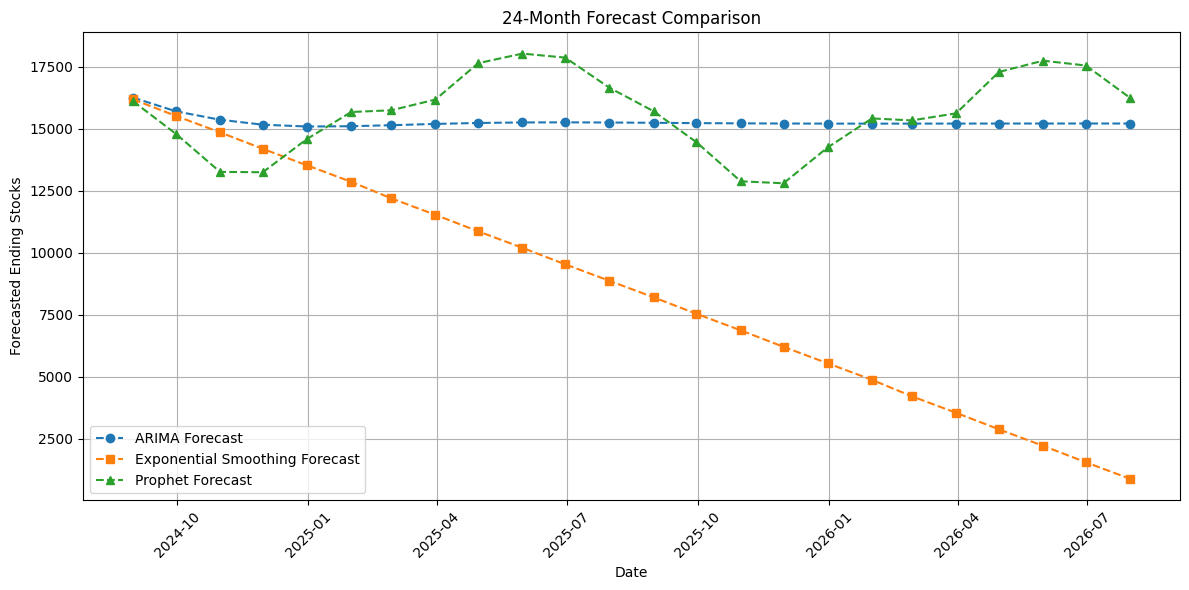

In [54]:
# Combine only forecasted values into a DataFrame
forecast_dates = pd.date_range(start=y.index[-1] + pd.DateOffset(1), periods=24, freq='M')
forecast_only = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast.values,
    'Exponential Smoothing': es_forecast.values,
    'Prophet': prophet_forecast.set_index('ds')['yhat'][-24:].values
})

# Plot the forecasts
plt.figure(figsize=(12, 6))

# ARIMA forecast
plt.plot(forecast_only['Date'], forecast_only['ARIMA'], label='ARIMA Forecast', linestyle='--', marker='o')

# Exponential Smoothing forecast
plt.plot(forecast_only['Date'], forecast_only['Exponential Smoothing'], label='Exponential Smoothing Forecast', linestyle='--', marker='s')

# Prophet forecast
plt.plot(forecast_only['Date'], forecast_only['Prophet'], label='Prophet Forecast', linestyle='--', marker='^')

# Add title and labels
plt.title('24-Month Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Ending Stocks')
plt.legend()

# Improve x-tick formatting for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
